<a href="https://colab.research.google.com/github/Ramprashanth17/info6105-Data-Science/blob/main/Combining_Data_Cleaning%2C_Feature_Selection%2C_Modeling_and_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

Prediction of levels of obesity by using machine learning classification models.

Data collected from UCI Machine Learning Repository.

About the Data

Dietary, exercise and personal daily habits of individuals from Mexico, Peru and Columbia are recorded to build estimation of obesity levels.

Obesity Level will be used as the target (y) variable, which consists of 7 classes - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

There are 17 attributes in total related to individual habits that are likely to determine obesity levels, such as number of main meals, time using technology devices, gender and transportation used.


Original dataset

Gender - Female/Male

age - Numeric value

height - Numeric value in meters

weight - Numeric value in kilograms

Has a family member suffered or suffers from overweight - Yes/No

Do you eat high caloric food frequently - Yes/No

Do you usually eat vegetables in your meals - Never/Sometimes/Always

How many main meals do you have daily - Between 1 y 2/Three/More than three

Do you eat any food between meals? No/Sometimes/Frequently/Always

Do you smoke? Yes/No

How much water do you drink daily? Less than a liter/Between 1 and 2 L/More than 2 L

Do you monitor the calories you eat daily - Yes/No

How often do you have physical activity? I do not have/1 or 2 days/2 or 4 days/4 or 5 days

How much time do you use technological devices such as cell phone, videogames, television, computer and others - 0–2 hours/3–5 hours/More than 5 hours

how often do you drink alcohol? - I do not drink/Sometimes/Frequently/Always

Which transportation do you usually use? Automobile/Motorbike/Bike/Public Transportation/Walking

# Using H2O Auto ML to perform the modeling and analysis

First we'll be using H2O an Auto ML tool which helps us in finding out the best model fit for this data and also gives us a clear understanding of the data by great visualizations.

In [ ]:
# Import the h2o Python module and H2OAutoML class and initialize a local H2O cluster.

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
# Installing packages and libraries required to run h2o

import glob, re
import numpy as np
import pandas as pd
from sklearn import *
from datetime import datetime
from xgboost import XGBRegressor
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Initializing the h2o cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 34 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_unknownUser_f7va1g
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
#Importing our dataset with H2O.
df = h2o.import_file('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.types

{'Gender': 'enum',
 'Age': 'real',
 'Height': 'real',
 'Weight': 'real',
 'family_history_with_overweight': 'enum',
 'FAVC': 'enum',
 'FCVC': 'real',
 'NCP': 'real',
 'CAEC': 'enum',
 'SMOKE': 'enum',
 'CH2O': 'real',
 'SCC': 'enum',
 'FAF': 'real',
 'TUE': 'real',
 'CALC': 'enum',
 'MTRANS': 'enum',
 'NObeyesdad': 'enum'}

In [ ]:
df.describe()

Rows:2111
Cols:17

Gender    Age                 Height              Weight              family_history_with_overweight    FAVC    FCVC               NCP                 CAEC       SMOKE    CH2O                SCC    FAF                 TUE                 CALC        MTRANS                 NObeyesdad
-------  --------  ------------------  ------------------  ------------------  --------------------------------  ------  -----------------  ------------------  ---------  -------  ------------------  -----  ------------------  ------------------  ----------  ---------------------  -------------------
type     enum      real                real                real                enum                              enum    real               real                enum       enum     real                enum   real                real                enum        enum                   enum
mins               14.0                1.45                39.0                                                          1.0                1.0                                     1.0                        0.0                 0.0
mean               24.312599908574136  1.7016773533870204  86.58605812648032                                             2.419043061582189  2.6856280497394596                      2.0080114040738986         1.0102976958787304  0.6578659237328283
maxs               61.0                1.98                173.0                                                         3.0                4.0                                     3.0                        3.0                 2.0
sigma              6.345968273732234   0.09330481986792    26.191171745204677                                            0.5339265785033    0.7780386488418612                      0.6129534517968722         0.8505924308366978  0.6089272596763782
zeros              0                   0                   0                                                             0                  0                                       0                          411                 557
missing  0         0                   0                   0                   0                                 0       0                  0                   0          0        0                   0      0                   0                   0           0                      0
0        Female    21.0                1.62                64.0                yes                               no      2.0                3.0                 Sometimes  no       2.0                 no     0.0                 1.0                 no          Public_Transportation  Normal_Weight
1        Female    21.0                1.52                56.0                yes                               no      3.0                3.0                 Sometimes  yes      3.0                 yes    3.0                 0.0                 Sometimes   Public_Transportation  Normal_Weight
2        Male      23.0                1.8                 77.0                yes                               no      2.0                3.0                 Sometimes  no       2.0                 no     2.0                 1.0                 Frequently  Public_Transportation  Normal_Weight
3        Male      27.0                1.8                 87.0                no                                no      3.0                3.0                 Sometimes  no       2.0                 no     2.0                 0.0                 Frequently  Walking                Overweight_Level_I
4        Male      22.0                1.78                89.8                no                                no      2.0                1.0                 Sometimes  no       2.0                 no     0.0                 0.0                 Sometimes   Public_Transportation  Overweight_Level_II
5        Male      29.0                1.62                53.0                no                                yes     2.0                3.0                 Sometim

**From the above description it can be seen the data types of the dataframe as per the H2O, the mean, min and max values of the columns**

In [ ]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [ ]:
df_train

Gender      Age    Height    Weight  family_history_with_overweight    FAVC      FCVC    NCP  CAEC        SMOKE      CH2O  SCC      FAF    TUE  CALC        MTRANS                 NObeyesdad
--------  -----  --------  --------  --------------------------------  ------  ------  -----  ----------  -------  ------  -----  -----  -----  ----------  ---------------------  -------------------
Female       21      1.62      64    yes                               no           2      3  Sometimes   no            2  no         0      1  no          Public_Transportation  Normal_Weight
Female       21      1.52      56    yes                               no           3      3  Sometimes   yes           3  yes        3      0  Sometimes   Public_Transportation  Normal_Weight
Male         22      1.78      89.8  no                                no           2      1  Sometimes   no            2  no         0      0  Sometimes   Public_Transportation  Overweight_Level_II
Male         29      1.62      53    no                                yes          2      3  Sometimes   no            2  no         0      0  Sometimes   Automobile             Normal_Weight
Female       23      1.5       55    yes                               yes          3      3  Sometimes   no            2  no         1      0  Sometimes   Motorbike              Normal_Weight
Male         22      1.64      53    no                                no           2      3  Sometimes   no            2  no         3      0  Sometimes   Public_Transportation  Normal_Weight
Male         24      1.78      64    yes                               yes          3      3  Sometimes   no            2  no         1      1  Frequently  Public_Transportation  Normal_Weight
Female       21      1.72      80    yes                               yes          2      3  Frequently  no            2  yes        2      1  Sometimes   Public_Transportation  Overweight_Level_II
Male         22      1.65      56    no                                no           3      3  Sometimes   no            3  no         2      0  Sometimes   Public_Transportation  Normal_Weight
Male         41      1.8       99    no                                yes          2      3  Sometimes   no            2  no         2      1  Frequently  Automobile             Obesity_Type_I
[1492 rows x 17 columns]

In [ ]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "NObeyesdad"
x = df.columns
x.remove(y)

In [ ]:
#Using H2O automl
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters.
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", though they are really good.
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)
#taken from references

In [ ]:
#starting the automl process
#It will test all the 10 models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which
#variable will it be using for the prediction purposes.
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
01:18:31.597: Project: AutoML_1_20240402_11831
01:18:31.599: Cross-validation disabled by user: no fold column nor nfolds > 1.
01:18:31.599: Setting stopping tolerance adaptively based on the training frame: 0.025889018653924886
01:18:31.601: Build control seed: 10
01:18:31.606: training frame: Frame key: AutoML_1_20240402_11831_training_py_2_sid_aa83    cols: 17    rows: 1492  chunks: 8    size: 93815  checksum: -7346182001033711245
01:18:31.606: validation frame: Frame key: py_4_sid_aa83    cols: 17    rows: 317  chunks: 8    size: 58014  checksum: 5669589216407972418
01:18:31.607: leaderboard frame: Frame key: py_4_sid_aa83    cols: 17    rows: 317  chunks: 8    size: 58014  checksum: 5669589216407972418
01:18:31.607: blending frame: NULL
01:18:31.607: response column: NObeyesdad
01:18:31.607: fold column: null
01:18:31.608: weights column: null
01:18:31.648: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w),

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20240402_11831


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    120                840                         559764                 3            8            7.9881        4             81            48.3274

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 7.763482701291777e-08
RMSE: 0.0002786302693766737
LogLoss: 0.00010088394156603718
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error    Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  -------  ---------
200                    0                0                 0                  0                   0                     0                      0        0 / 200
0                      200              0                 0                  0                   0                     0                      0        0 / 200
0                      0                241               0                  0                   0                     0                      0        0 / 241
0                      0                0                 208                0                   0                     0                      0        0 / 208
0                      0                0                 0                  218                 0                     0                      0        0 / 218
0                      0                0                 0                  0                   206                   0                      0        0 / 206
0                      0                0                 0                  0                   0                     219                    0        0 / 219
200                    200              241               208                218                 206                   219                    0        0 / 1,492

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1
4    1
5    1
6    1
7    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.016102551802979027
RMSE: 0.12689583051849665
LogLoss: 0.0728502647855245
Mean Per-Class Error: 0.013537187450230926
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  -------
43                     0                0                 0                  0                   0                     0                      0          0 / 43
0                      46               0     

# The top 5 important variables as per the H2O model is:

Weight
Height
Gender
Age
FCVC

These variables are most important to classify according to the obesity scale.

In [ ]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well.
#Here from the leaderboard we have "GBM_2_AutoML_1_20240316_211729	" as the leader(best performing) model .

lb = aml.leaderboard

In [ ]:
lb.head()

model_id                             mean_per_class_error    logloss      rmse        mse
---------------------------------  ----------------------  ---------  --------  ---------
GBM_3_AutoML_1_20240402_11831                   0.0135372  0.0728503  0.126896  0.0161026
GBM_4_AutoML_1_20240402_11831                   0.0166428  0.0714185  0.127595  0.0162805
GBM_5_AutoML_1_20240402_11831                   0.0195582  0.0662521  0.127151  0.0161674
GBM_2_AutoML_1_20240402_11831                   0.0226638  0.0635617  0.122524  0.0150121
XGBoost_3_AutoML_1_20240402_11831               0.0257694  0.104331   0.163235  0.0266455
GBM_1_AutoML_1_20240402_11831                   0.035493   0.112709   0.174047  0.0302923
XRT_1_AutoML_1_20240402_11831                   0.0453276  0.322246   0.312211  0.0974756
XGBoost_2_AutoML_1_20240402_11831               0.0455178  0.137926   0.193714  0.0375252
DRF_1_AutoML_1_20240402_11831                   0.0552018  0.259513   0.278382  0.0774963
XGBoost_1_AutoML_1_20240402_11831               0.05775    0.193131   0.235271  0.0553526
[10 rows x 5 columns]

**As per the leader board "GBM_5_AutoML" is the best model fit for our dataset**



In [ ]:
#Using the leader model for prediction.
OverWeight_pred=aml.leader.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
OverWeight_pred.head()
#predicitions

predict                Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II
-------------------  ---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------
Overweight_Level_II            1.03148e-06      2.38149e-05       3.59454e-05        2.6455e-07          3.94742e-07           0.000538006            0.999401
Normal_Weight                  3.52529e-05      0.999592          1.4354e-05         8.54003e-07         2.8013e-06            0.00034888             5.87773e-06
Normal_Weight                  1.23792e-06      0.999565          1.14813e-06        5.0172e-07          9.06404e-08           0.000430905            1.08845e-06
Normal_Weight                  0.00378245       0.996071          4.76775e-06        1.32442e-05         7.41938e-07           0.000116678            1.10587e-05
Normal_Weight                  3.03361e-05      0.999744          1.16156e-05        5.5914e-07          7.19341e-07           0.000166519            4.60369e-05
Normal_Weight                  4.05384e-05      0.999709          5.79926e-06        5.98949e-07         4.26516e-07           0.000233821            9.58022e-06
Normal_Weight                  0.00512599       0.994828          2.99371e-06        1.18353e-05         1.26363e-06           1.92411e-05            1.02045e-05
Normal_Weight                  6.90318e-06      0.999814          7.03448e-06        5.05607e-07         3.30096e-07           0.000169472            1.45202e-06
Normal_Weight                  9.22816e-05      0.99776           9.30467e-06        1.43194e-06         2.384e-06             0.00210476             3.00837e-05
Normal_Weight                  7.43893e-07      0.999968          3.5742e-07         9.35369e-08         4.67884e-08           2.91368e-05            1.61449e-06
[10 rows x 8 columns]

In [ ]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20240401_211729)

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.02687526571310572
RMSE: 0.16393677352292169
LogLoss: 0.1441147517874686
Mean Per-Class Error: 0.037618046672245
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  --------
26                     3                0                 0                  0                   0                     0                      0.103448   3 / 29
1                      37               0                 0                  0                   3                     0                      0.097561   4 / 41
0                      0                60                0                  0                   0                     1                      0.0163934  1 / 61
0                      0                0                 50                 0                   0                     0                      0          0 / 50
0                      0                0                 1                  50                  0                     0                      0.0196078  1 / 51
0                      1                0                 0                  0                   37                    0                      0.0263158  1 / 38
0                      0                0                 0                  0                   0                     32                     0          0 / 32
27                     41               60                51                 50                  40                    33                     0.0331126  10 / 302

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.966887
2    0.990066
3    0.996689
4    0.996689
5    1
6    1
7    1

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_ids
#all the models that were used in the automl are below


['GBM_3_AutoML_1_20240402_11831',
 'GBM_4_AutoML_1_20240402_11831',
 'GBM_5_AutoML_1_20240402_11831',
 'GBM_2_AutoML_1_20240402_11831',
 'XGBoost_3_AutoML_1_20240402_11831',
 'GBM_1_AutoML_1_20240402_11831',
 'XRT_1_AutoML_1_20240402_11831',
 'XGBoost_2_AutoML_1_20240402_11831',
 'DRF_1_AutoML_1_20240402_11831',
 'XGBoost_1_AutoML_1_20240402_11831']

In [ ]:
aml.leader.confusion_matrix(df_test)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  --------
26                     3                0                 0                  0                   0                     0                      0.103448   3 / 29
1                      37               0                 0                  0                   3                     0                      0.097561   4 / 41
0                      0                60                0                  0                   0                     1                      0.0163934  1 / 61
0                      0                0                 50                 0                   0                     0                      0          0 / 50
0                      0                0                 1                  50                  0                     0                      0.0196078  1 / 51
0                      1                0                 0                  0                   37                    0                      0.0263158  1 / 38
0                      0                0                 0                  0                   0                     32                     0          0 / 32
27                     41               60                51                 50                  40                    33                     0.0331126  10 / 302

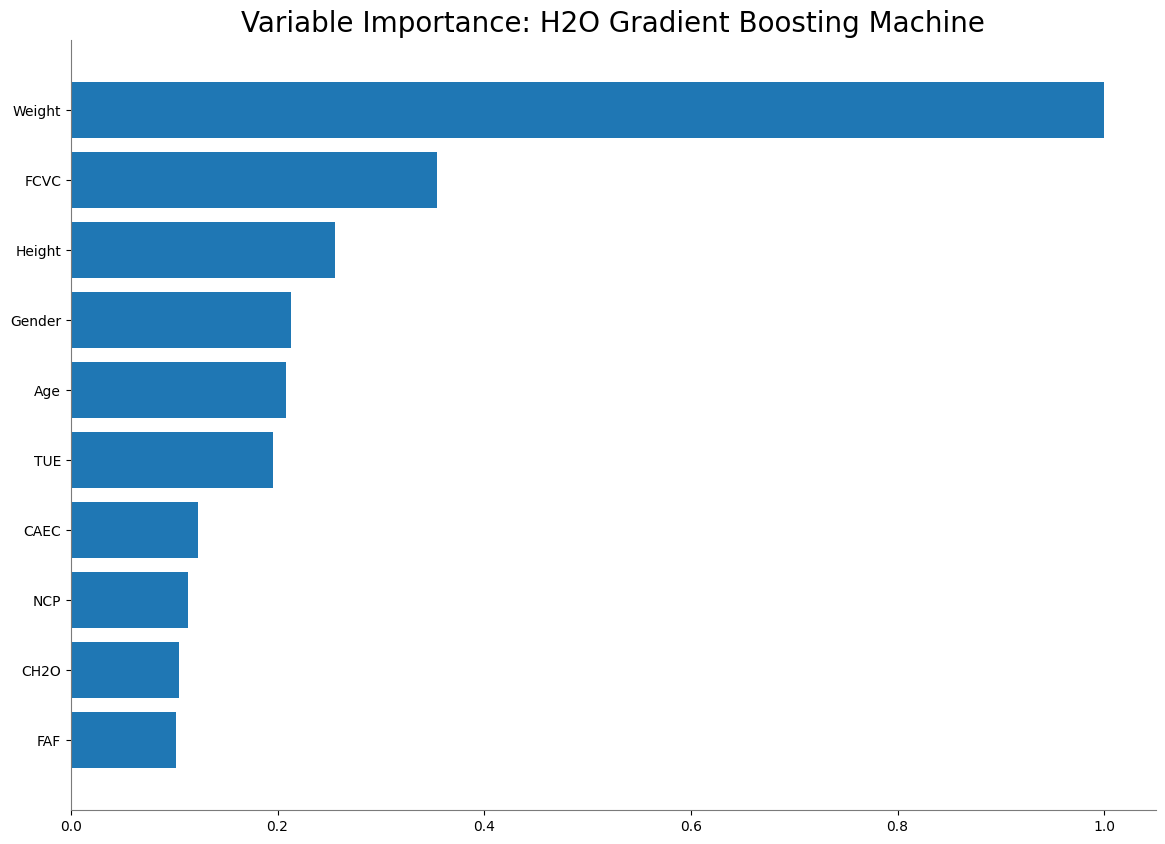

<Figure size 640x480 with 0 Axes>

In [ ]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                             mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  -------
GBM_5_AutoML_1_20240402_11831                   0.0317897   0.172487  0.166992  0.0278865                7803                   0.559421  GBM
GBM_2_AutoML_1_20240402_11831                   0.0355491   0.146993  0.166204  0.0276239               13335                   0.469034  GBM
XGBoost_3_AutoML_1_20240402_11831               0.0355491   0.11396   0.165677  0.027449                 7802                   0.065248  XGBoost
GBM_4_AutoML_1_20240402_11831                   0.0361763   0.143734  0.169745  0.0288135               10208                   0.381376  GBM
GBM_3_AutoML_1_20240402_11831                   0.037618    0.144115  0.163937  0.0268753                8795                   0.436074  GBM
GBM_1_AutoML_1_20240402_11831                   0.0404752   0.11844   0.17676   0.0312439               22709                   0.46442   GBM
XGBoost_2_AutoML_1_20240402_11831               0.0413774   0.144149  0.194593  0.0378664               15410                   0.092941  XGBoost
DRF_1_AutoML_1_20240402_11831                   0.0549626   0.229205  0.254313  0.0646751                9049                   0.146253  DRF
XGBoost_1_AutoML_1_20240402_11831               0.0605159   0.177685  0.211615  0.0447808               13887                   0.055522  XGBoost
XRT_1_AutoML_1_20240402_11831                   0.063408    0.293372  0.289251  0.083666                 4679                   0.136299  DRF
[10 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_3_AutoML_1_20240402_11831

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  --------
26                     3                0                 0                  0                   0                     0                      0.103448   3 / 29
1                      37               0                 0                  0                   3                     0                      0.097561   4 / 41
0                      0                60                0                  0                   0                     1                      0.0163934  1 / 61
0                      0                0                 50                 0                   0                     0                      0          0 / 50
0                      0                0                 1                  50                  0                     0                      0.0196078  1 / 51
0                      1                0                 0                  0                   37                    0                      0.0263158  1 / 38
0                      0                0                 0                  0                   0                     32                     0          0 / 32
27                     41               60                51                 50                  40                    33                     0.0331126  10 / 302

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

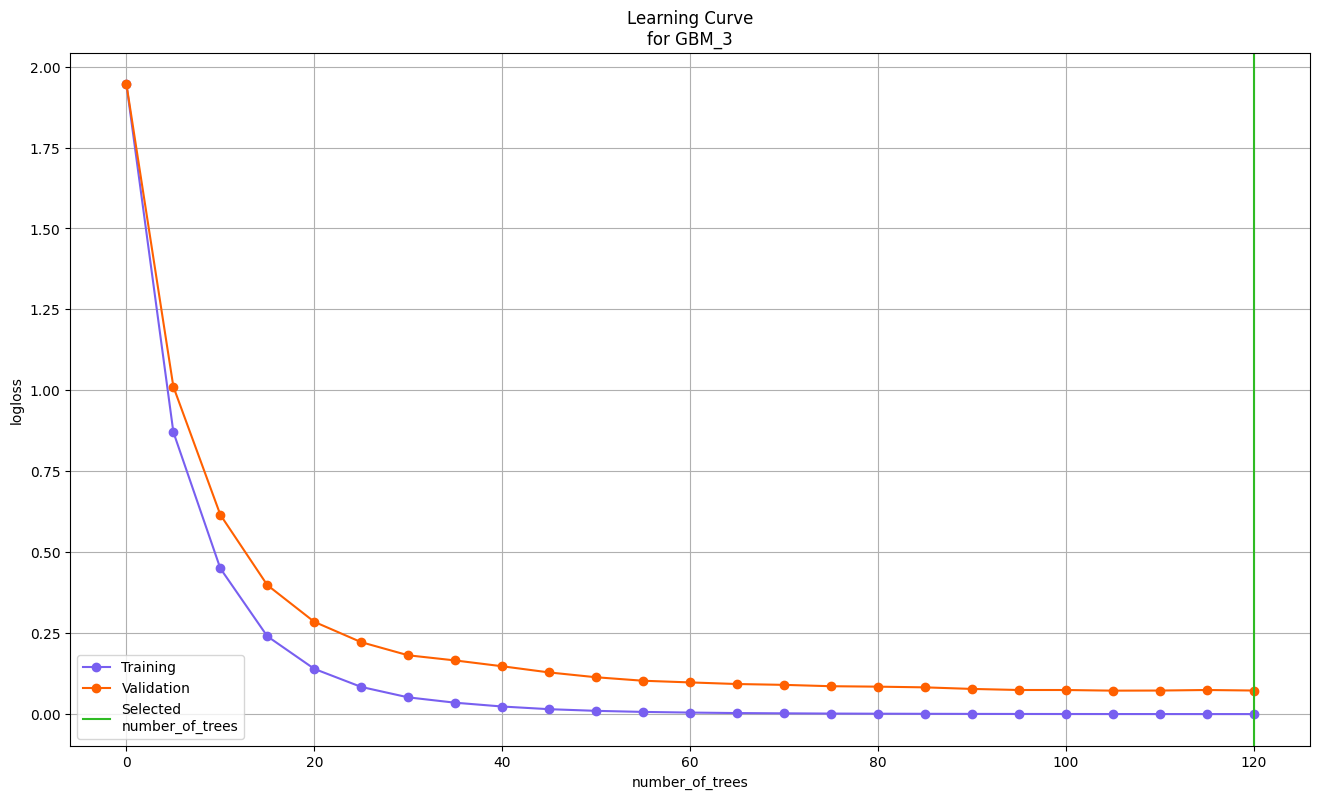

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

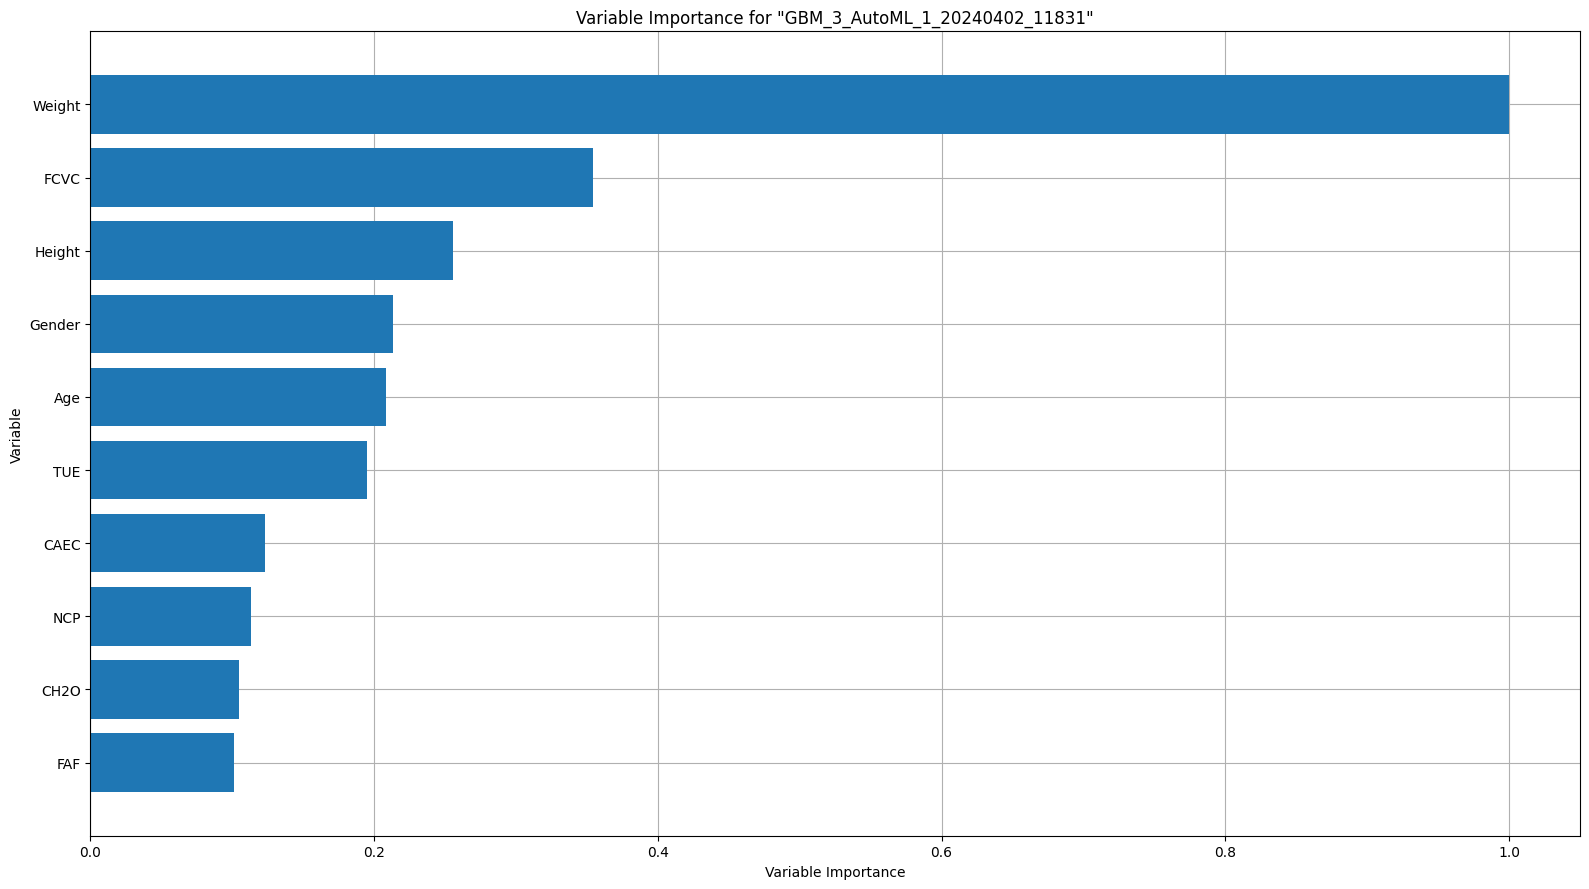

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

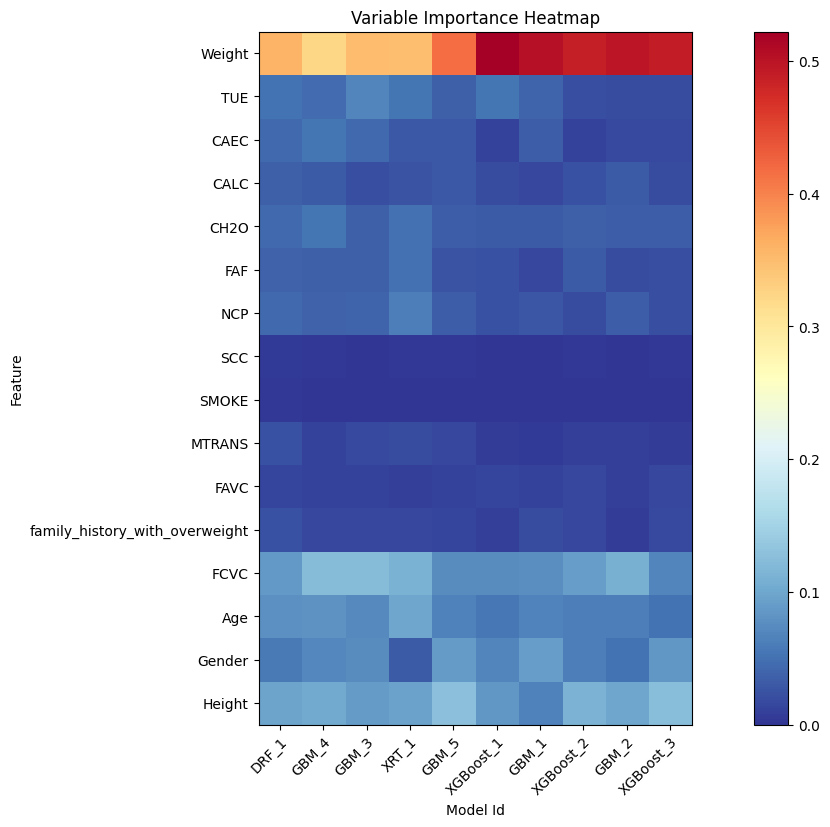

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

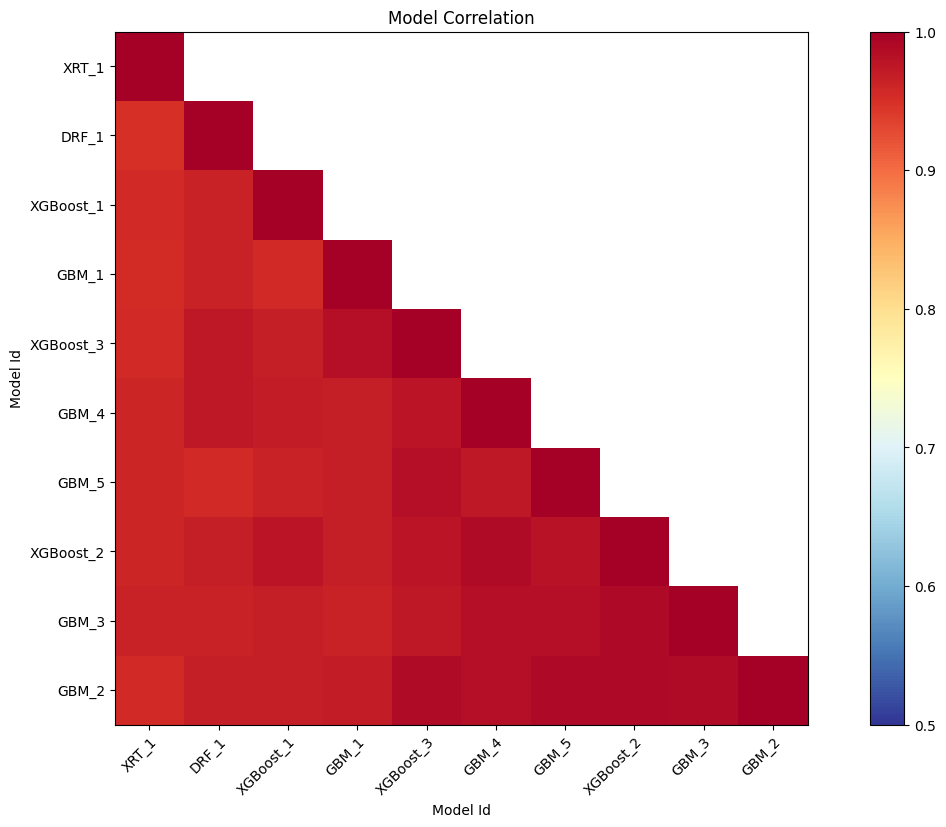

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

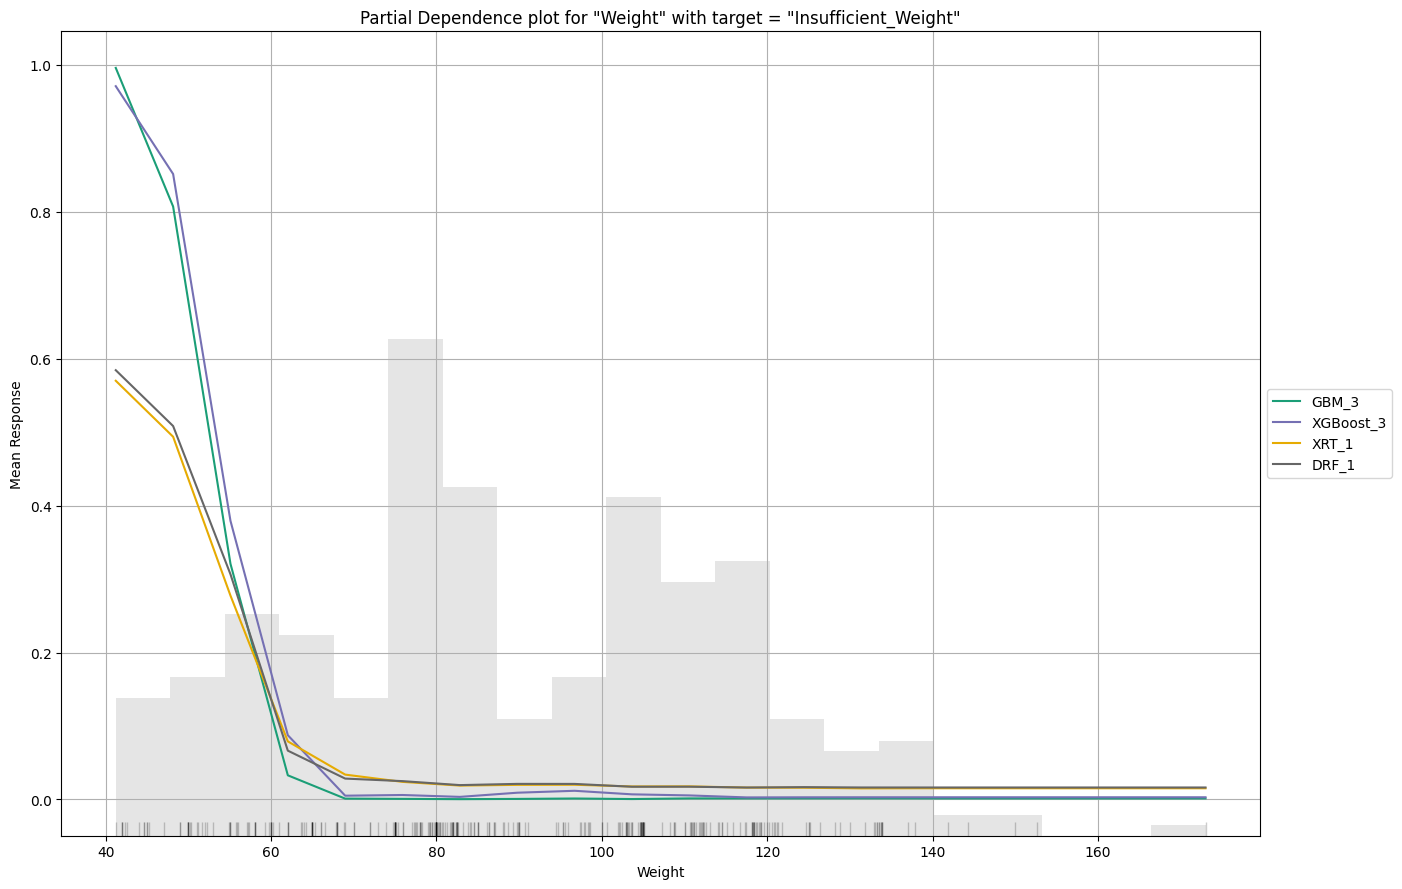

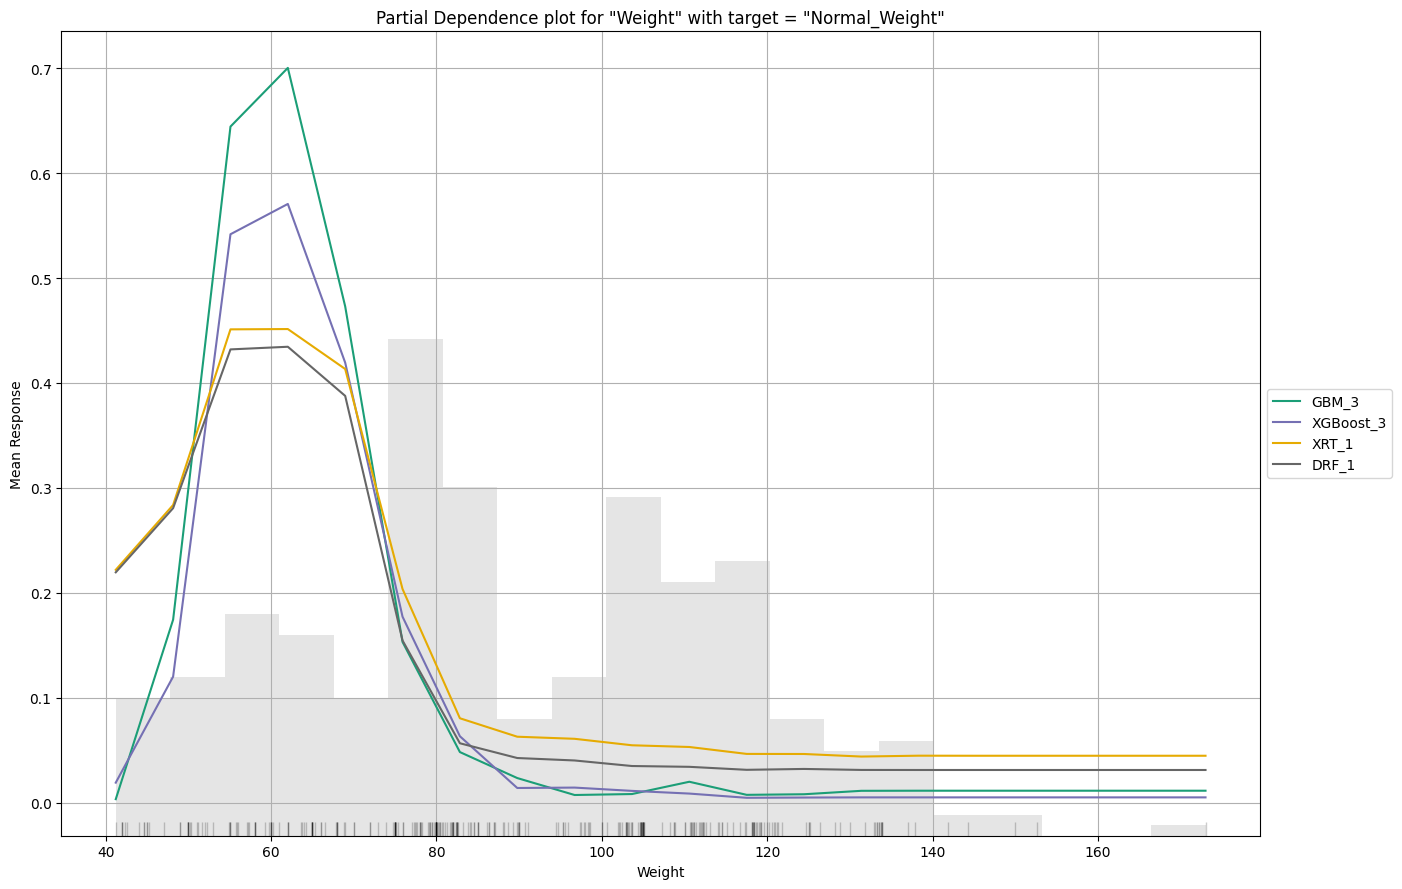

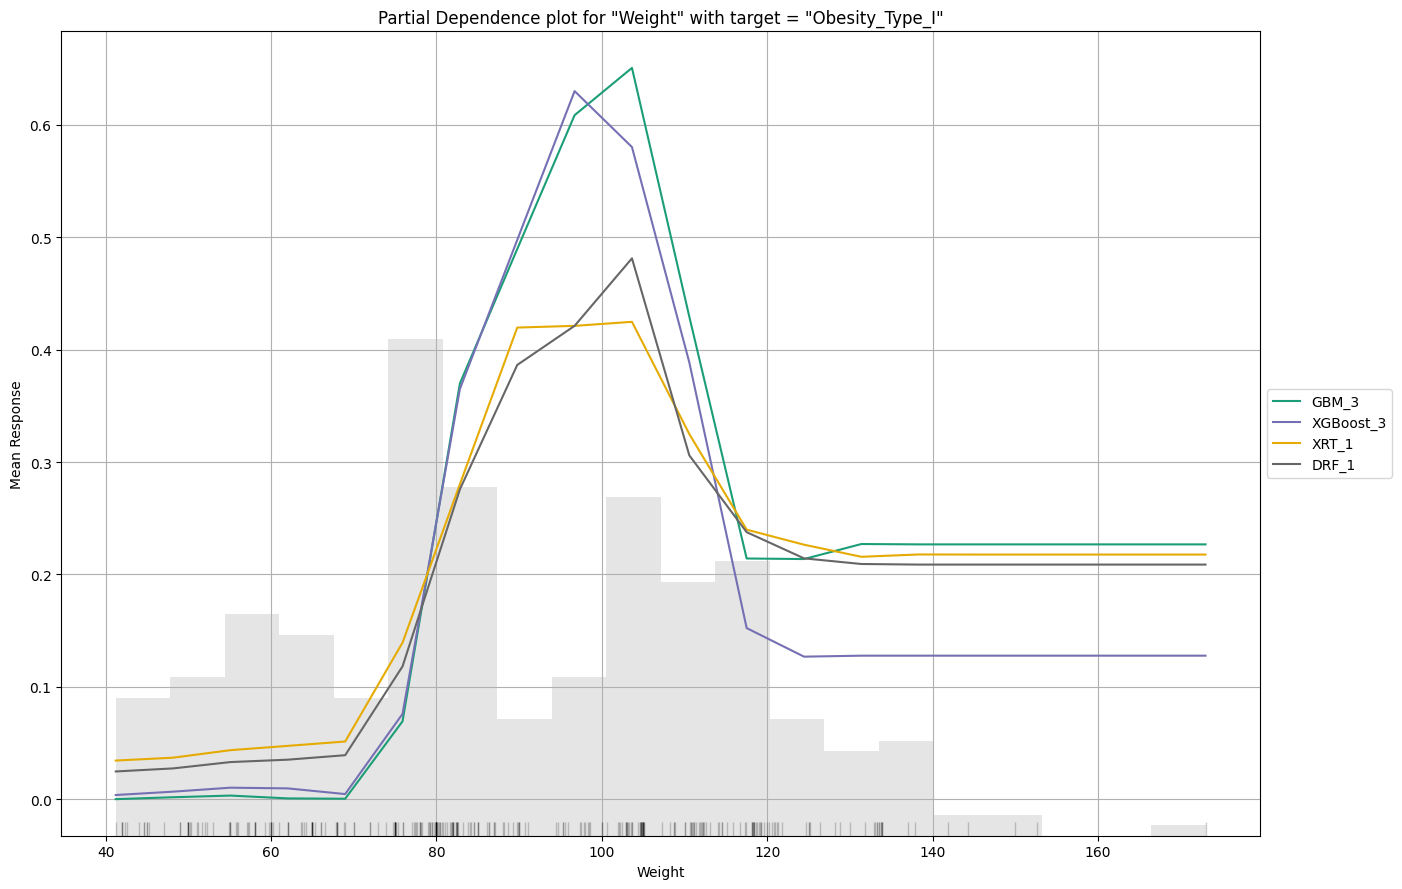

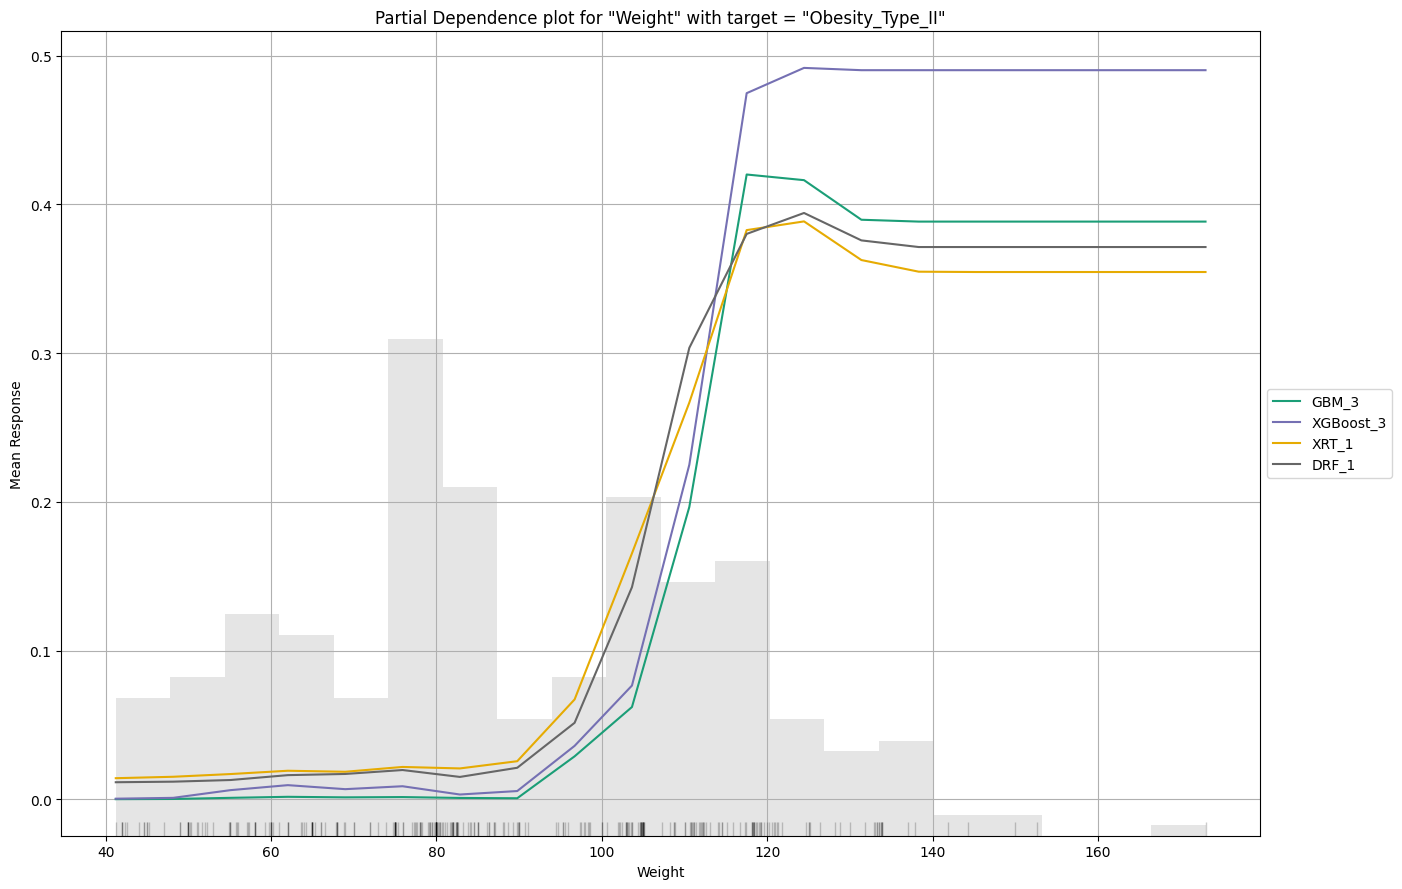

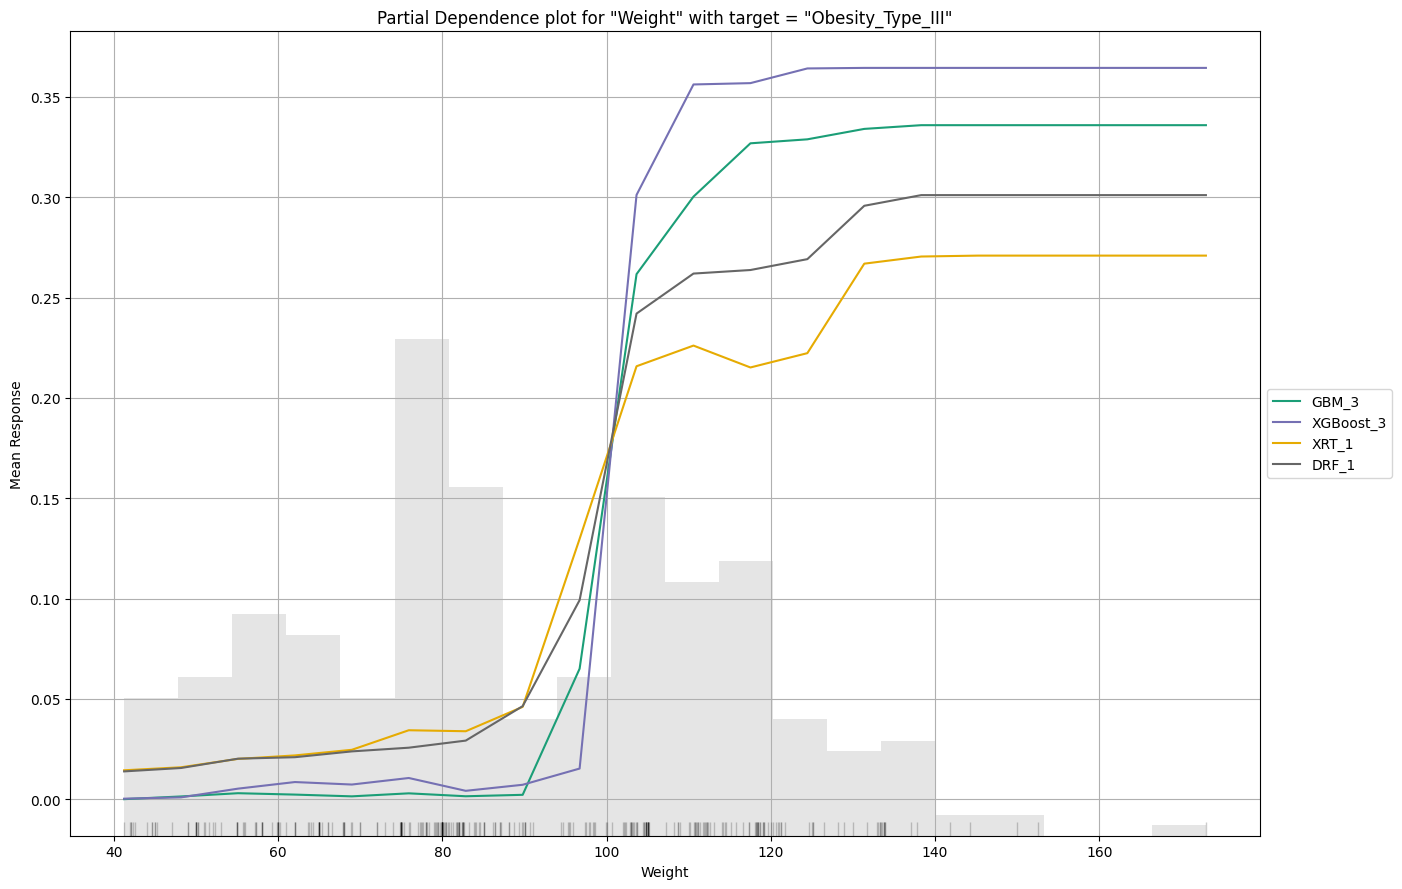

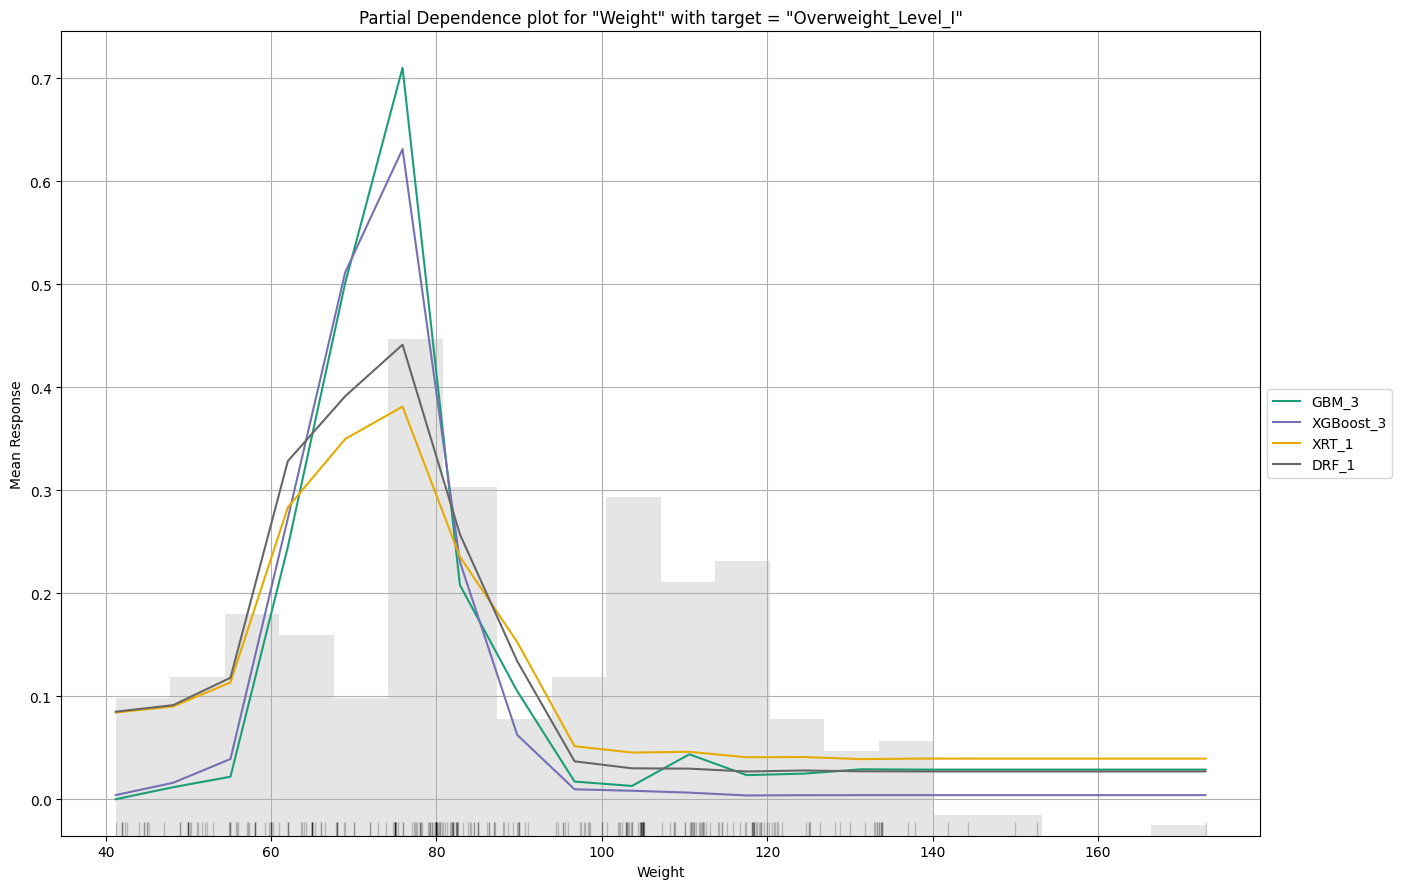

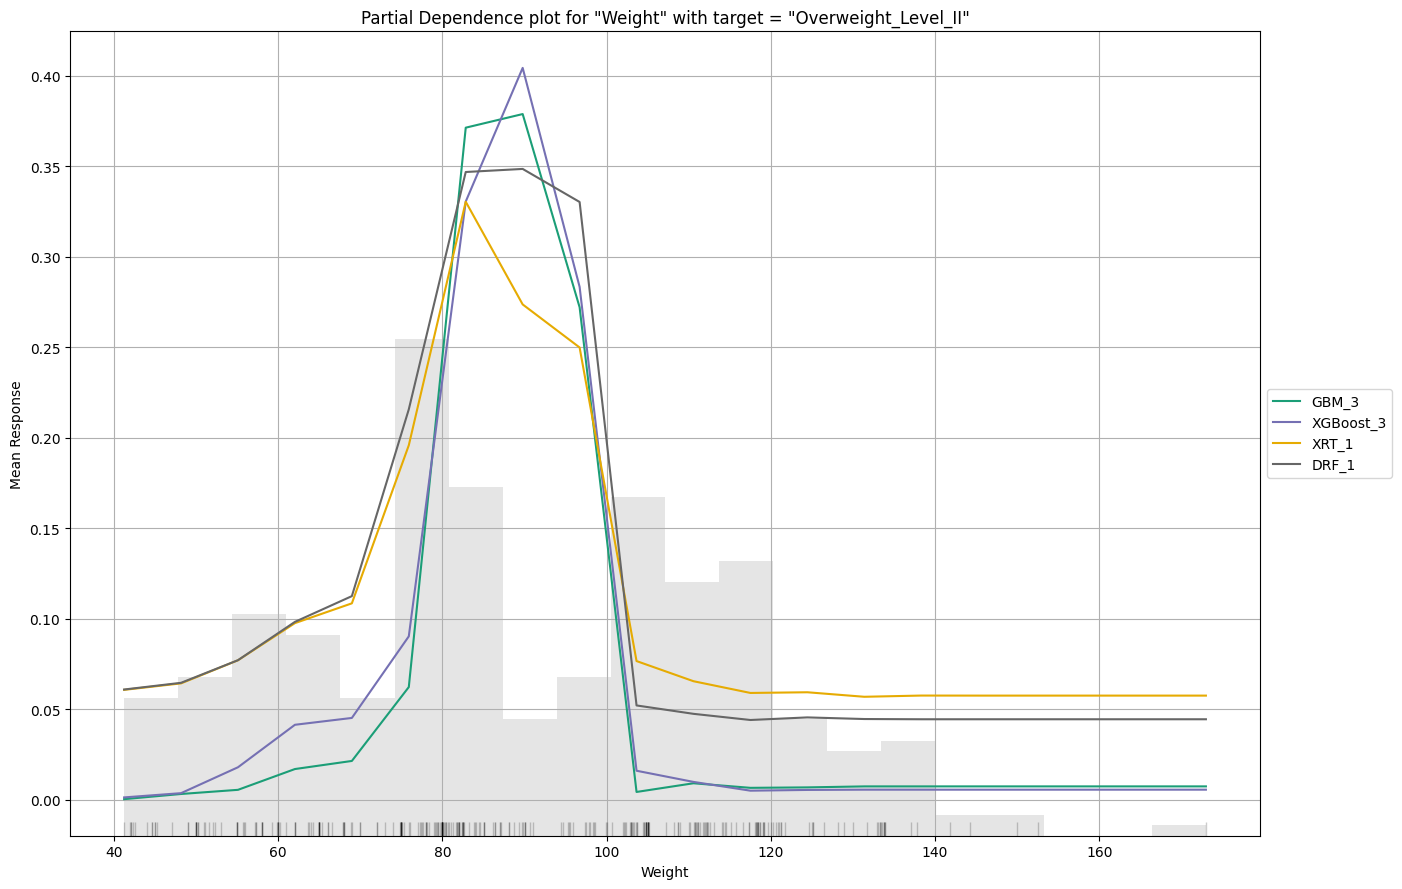

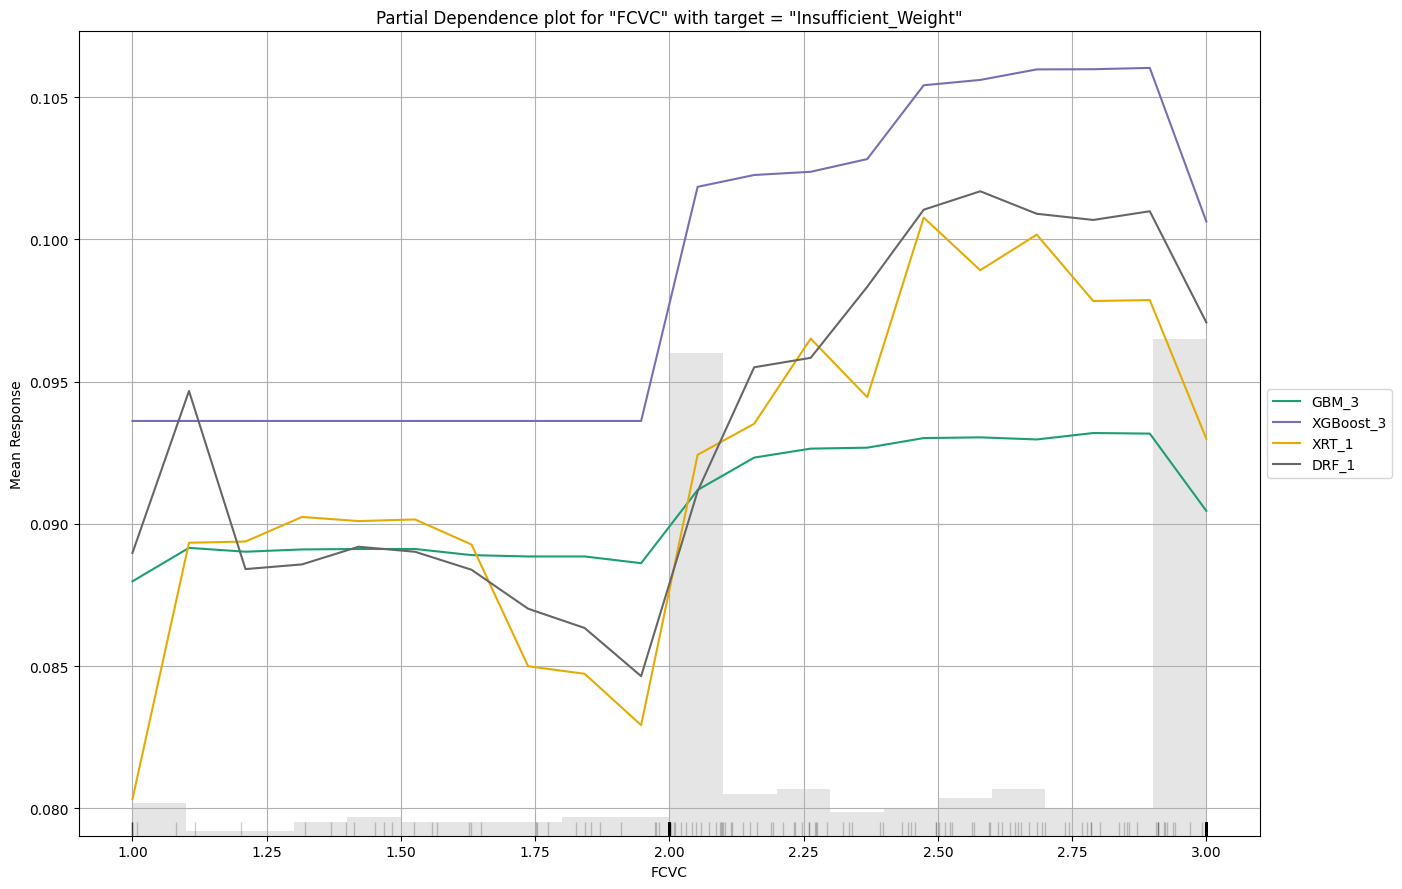

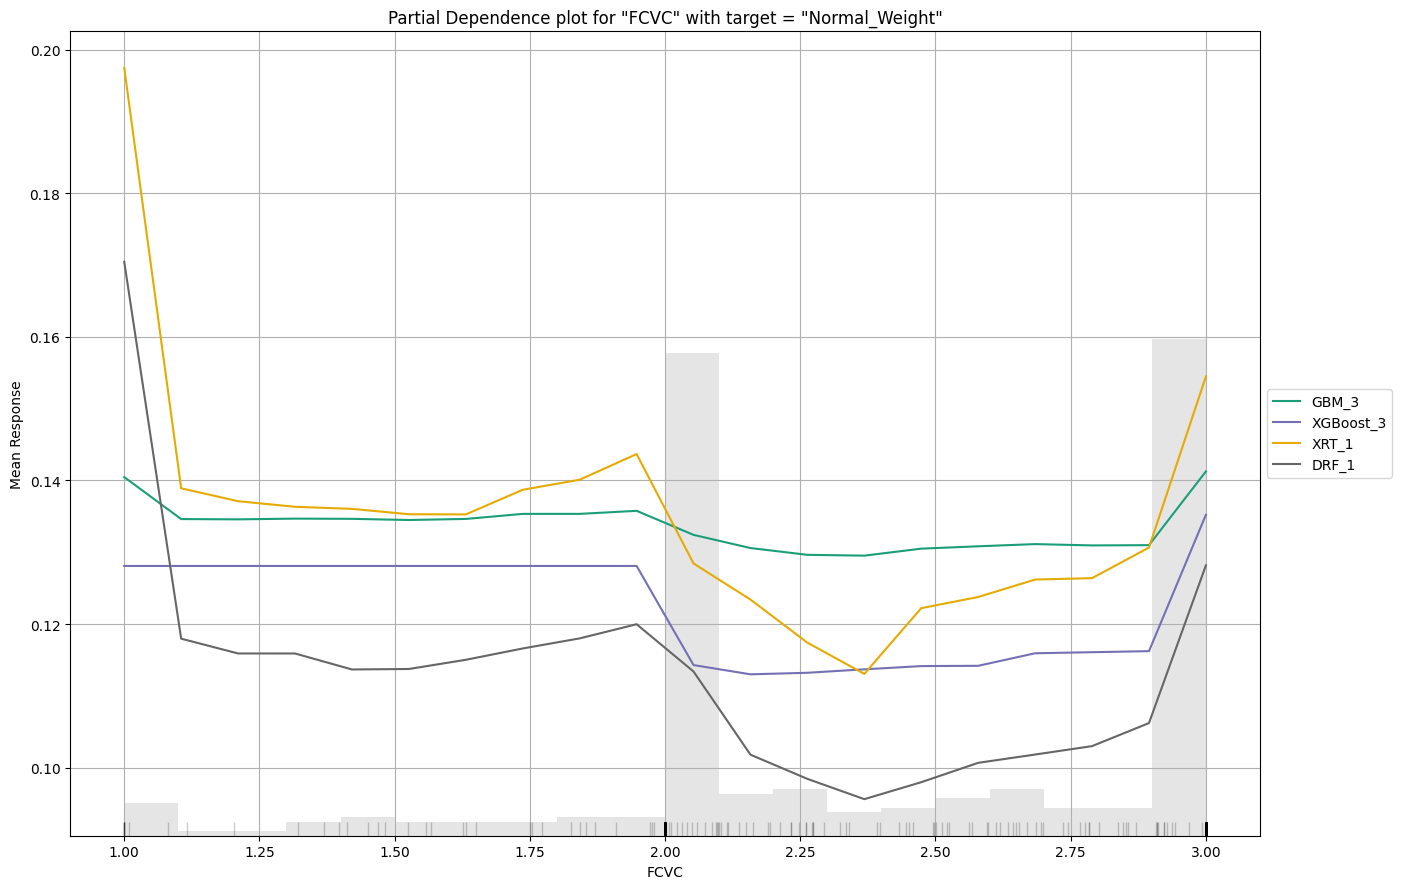

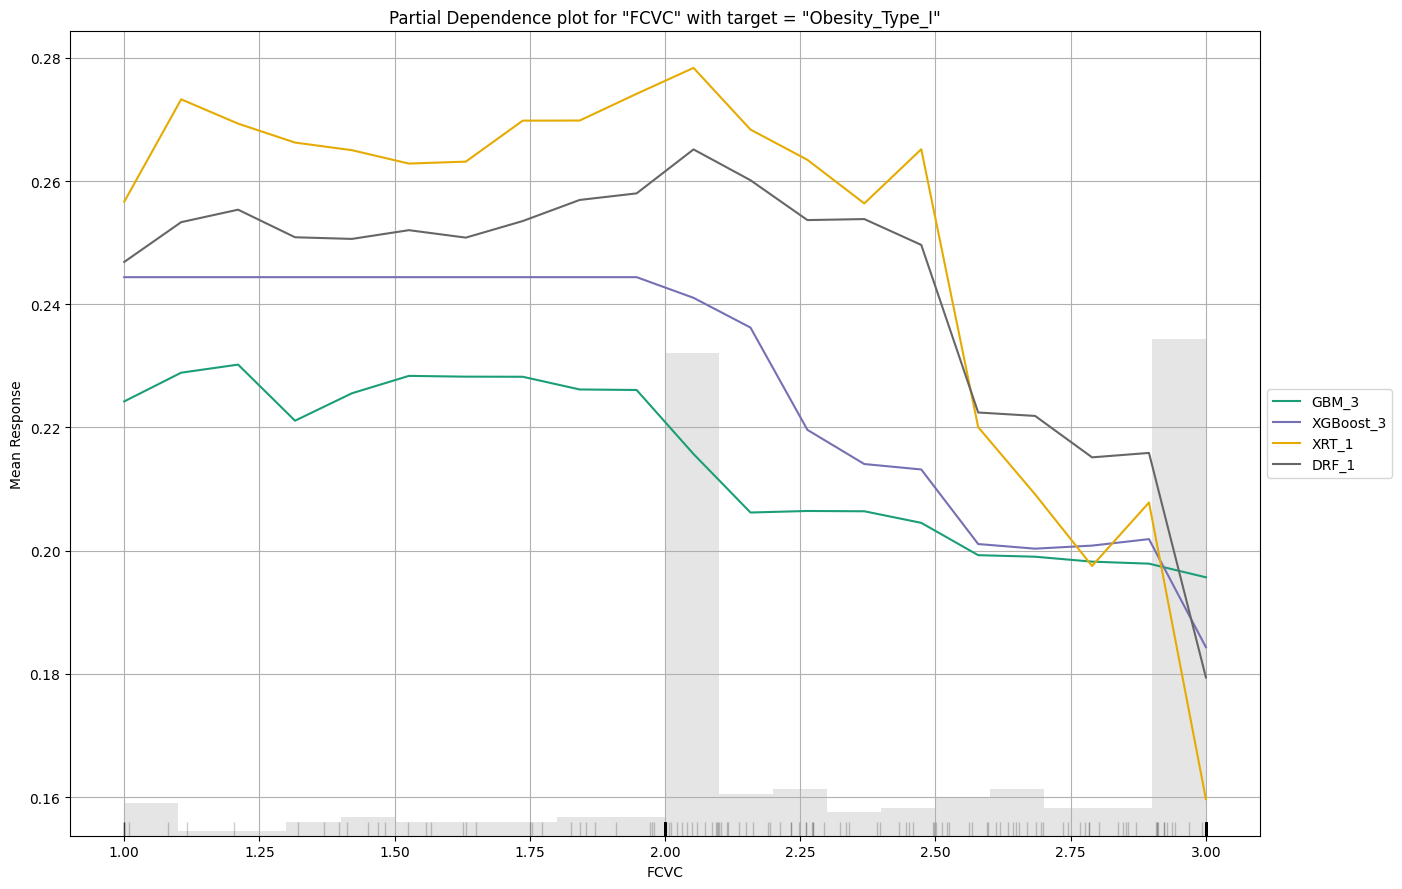

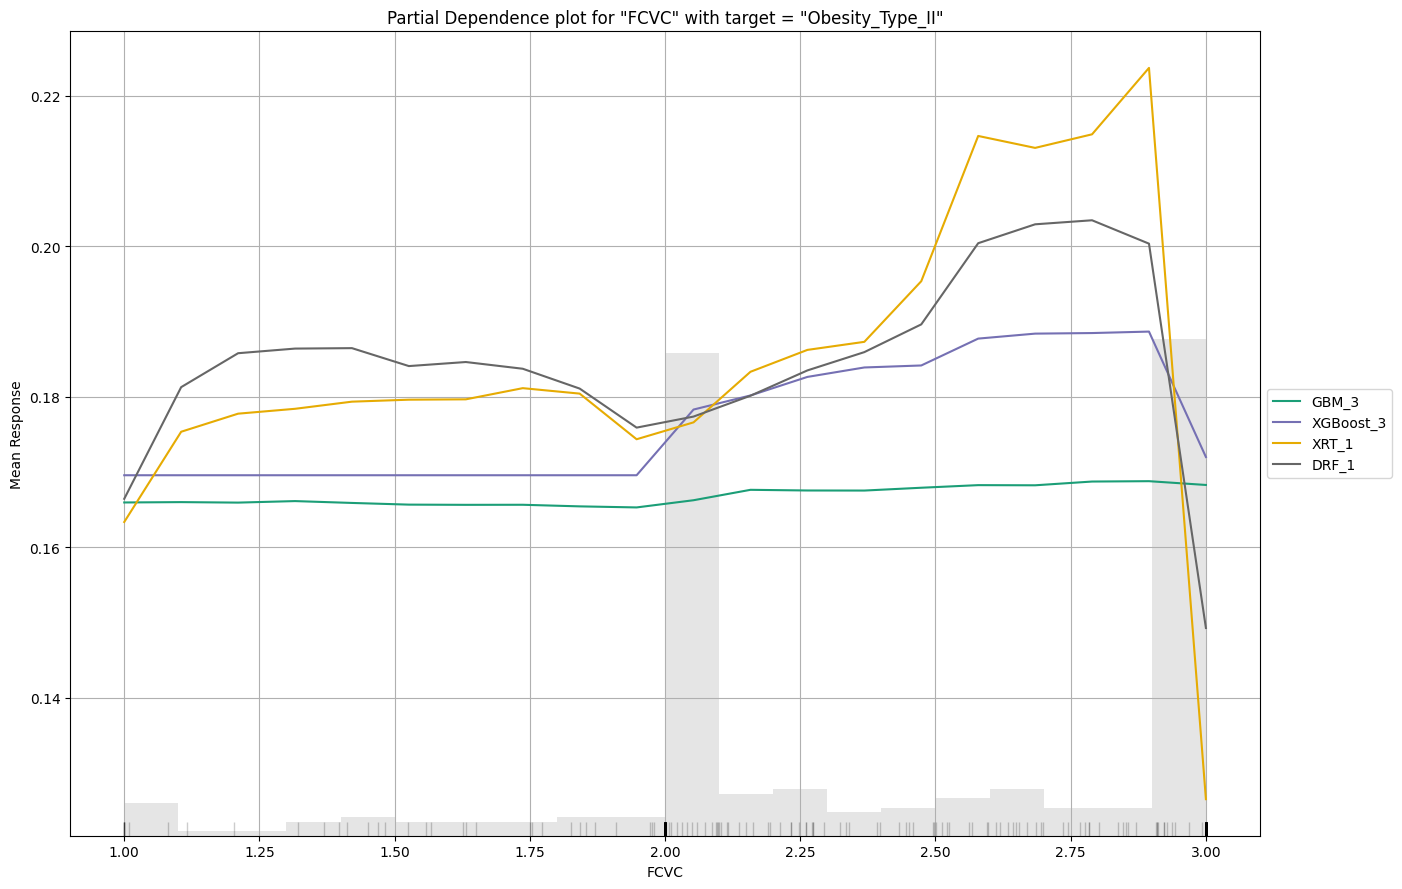

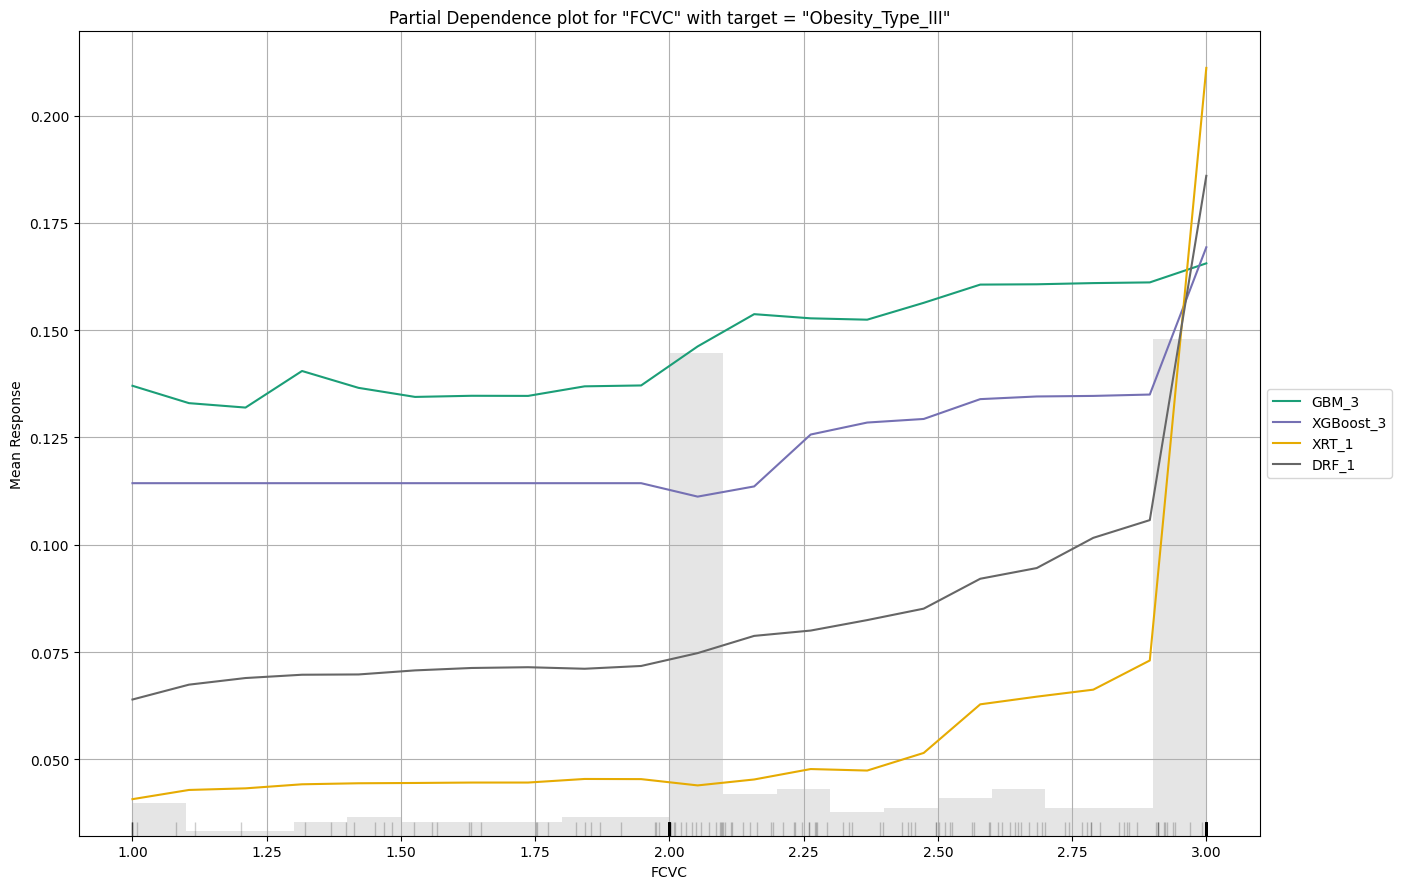

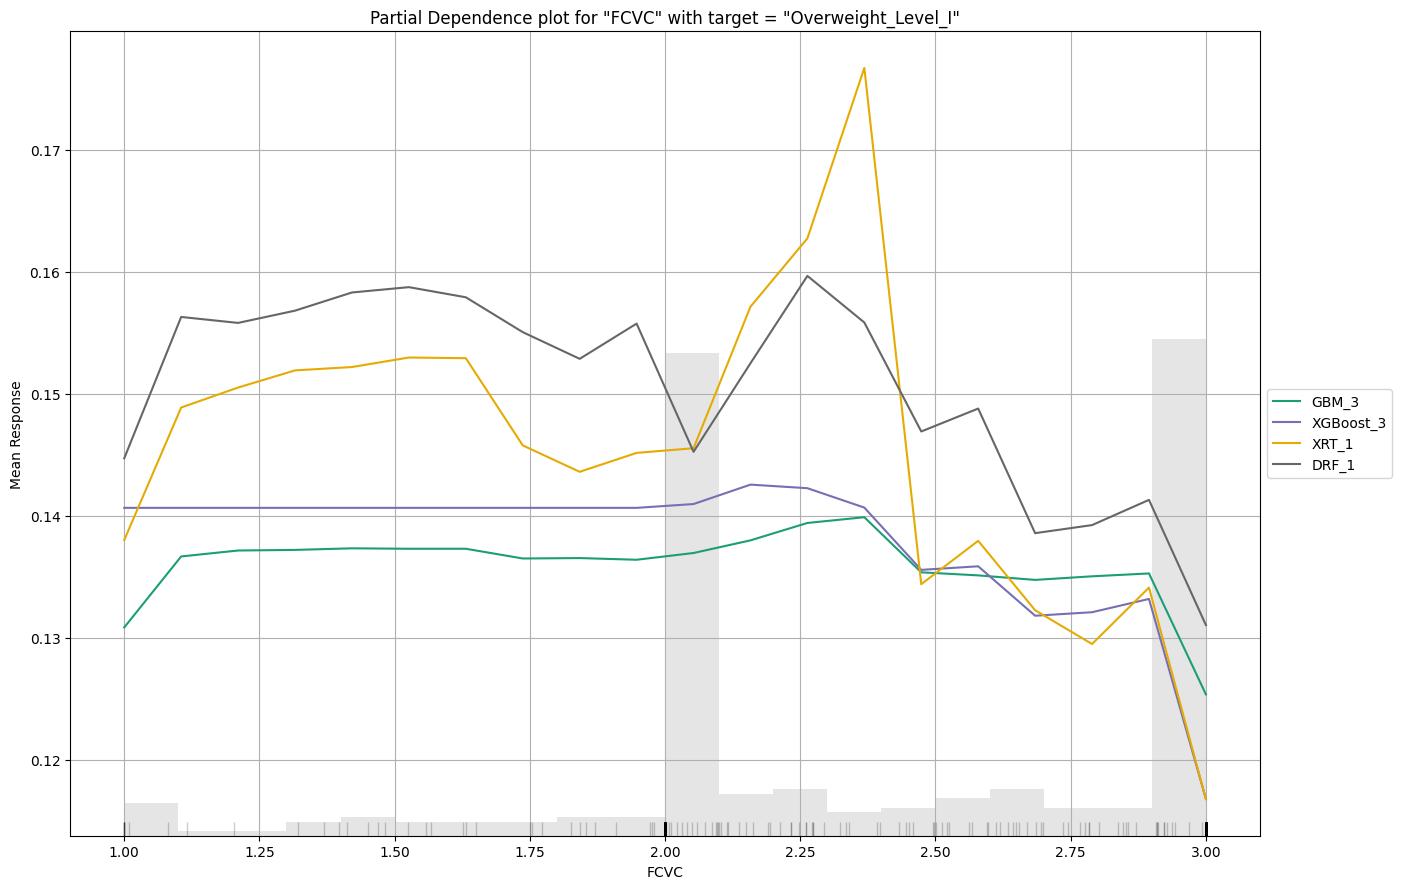

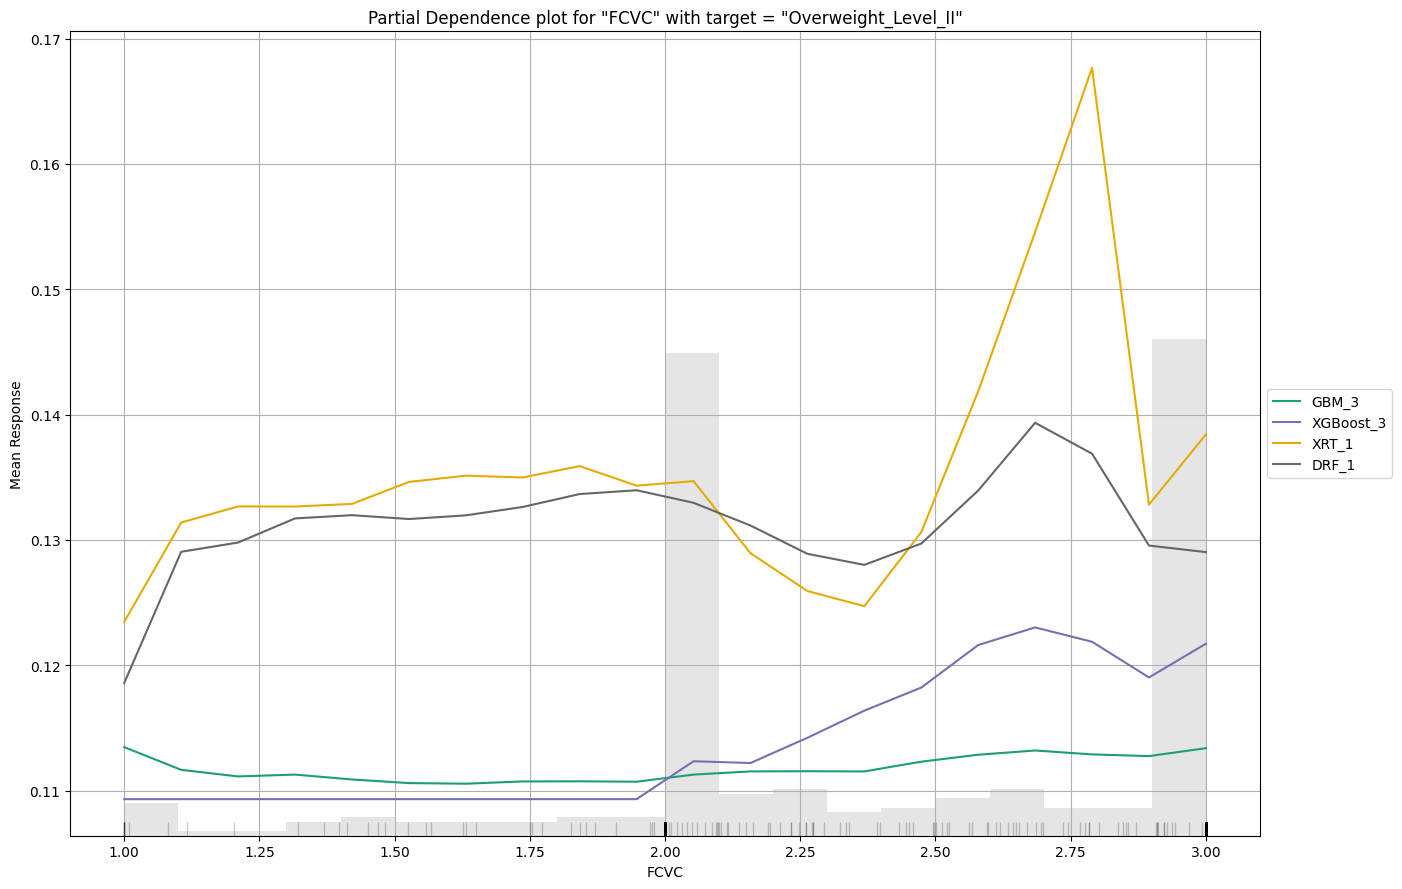

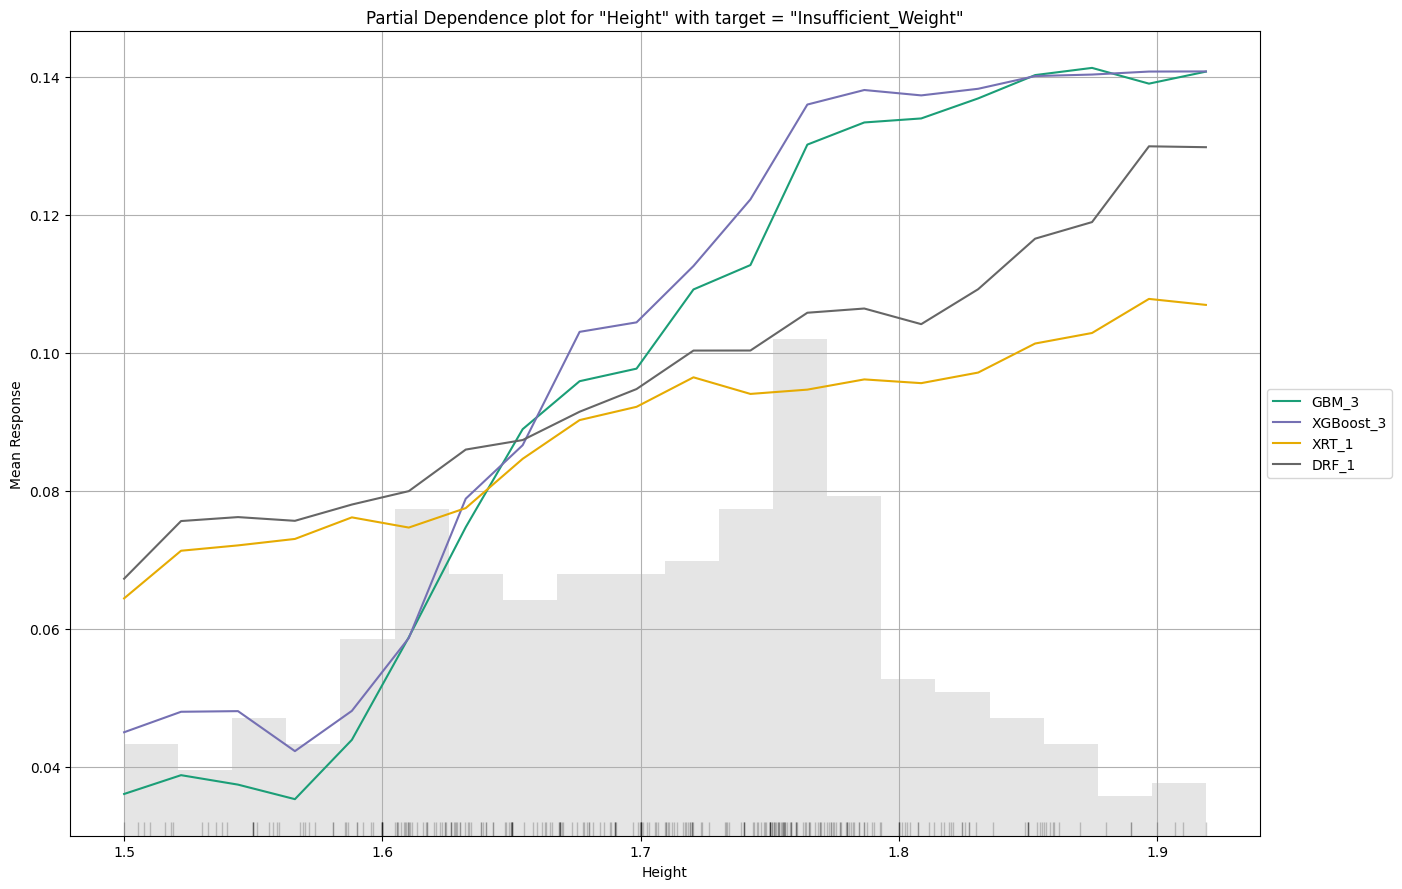

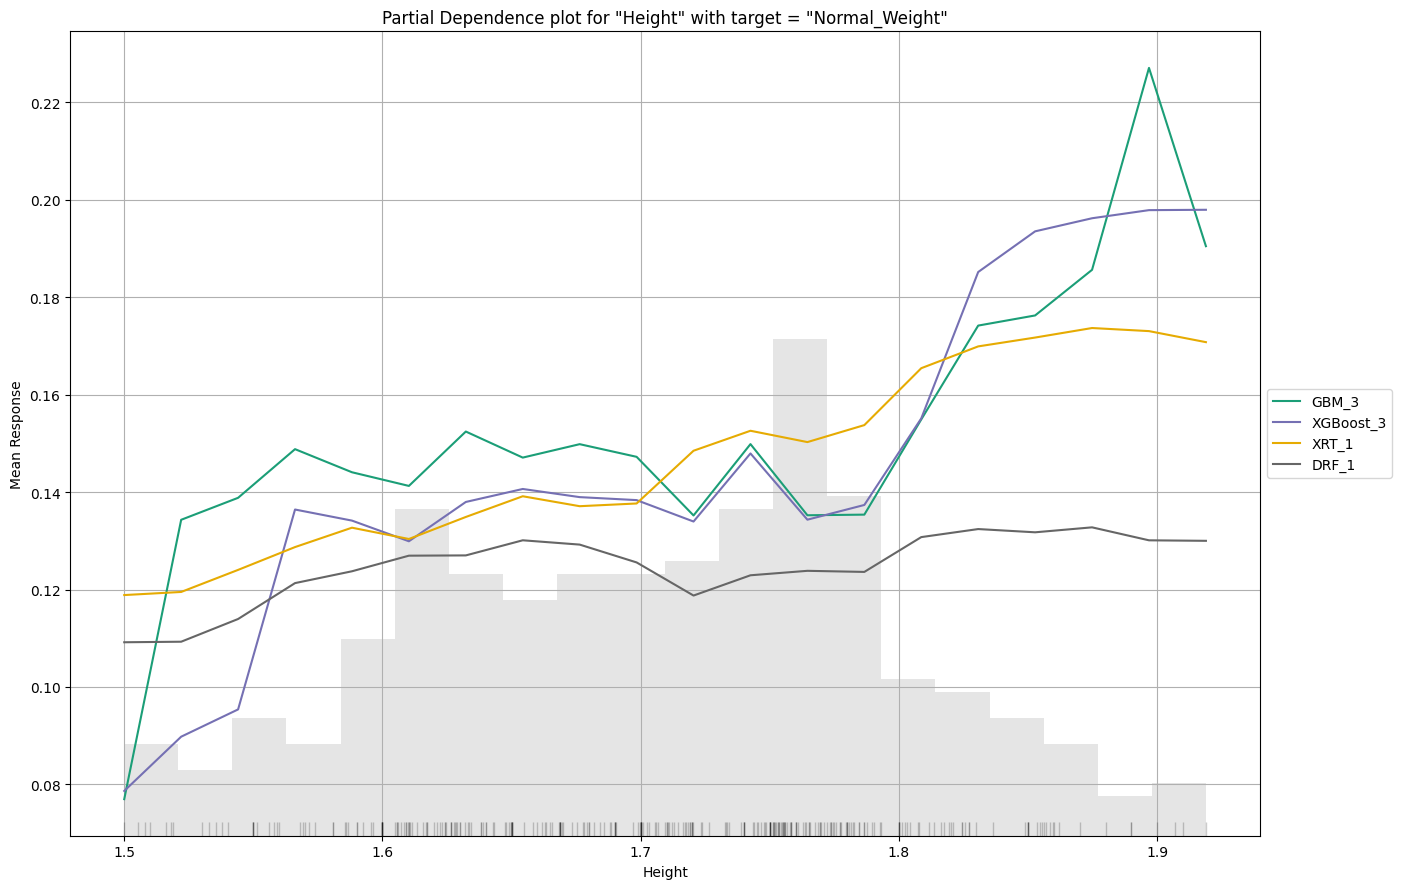

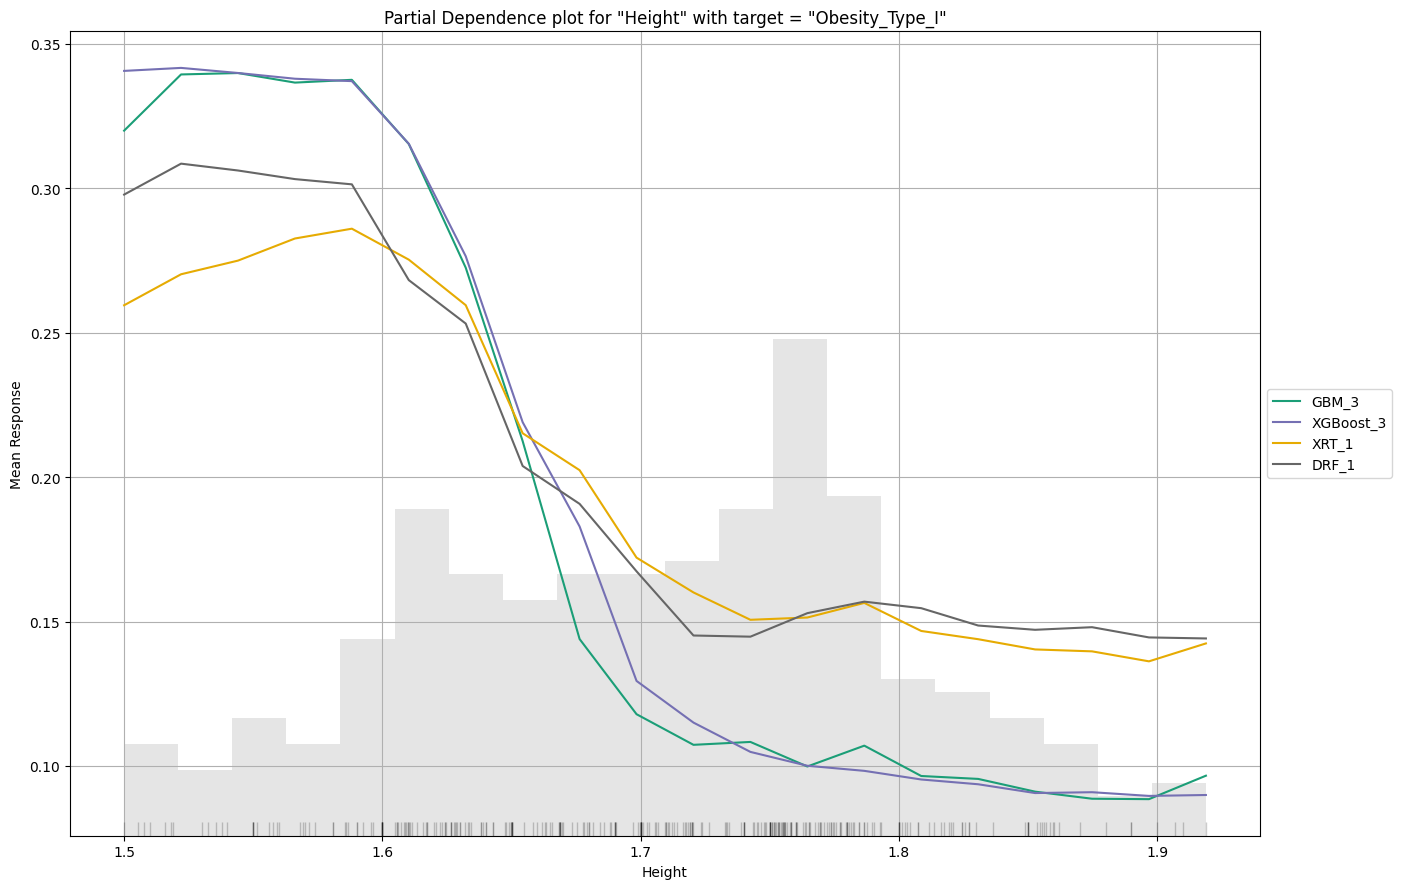

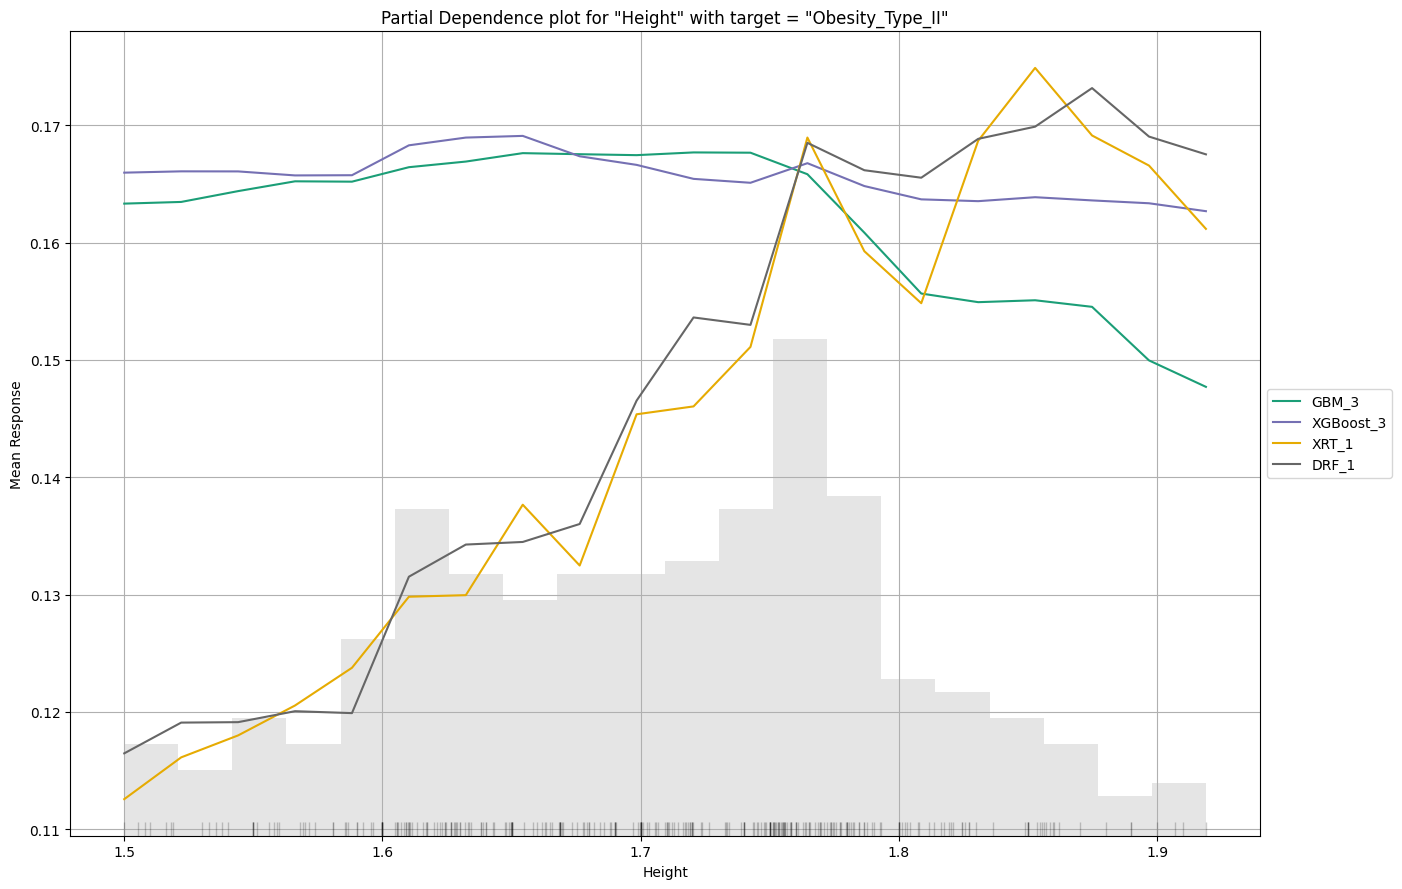

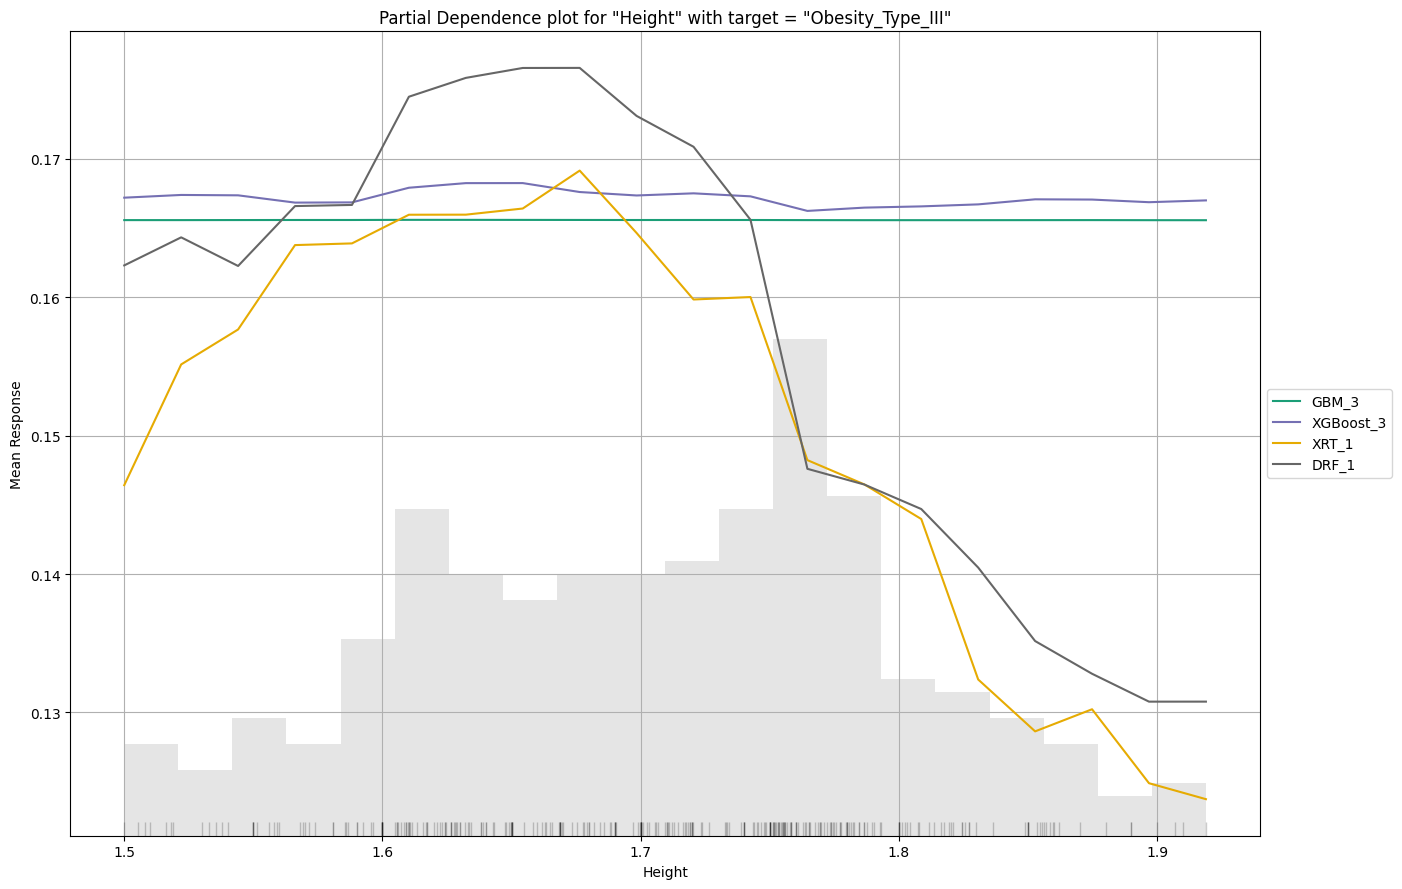

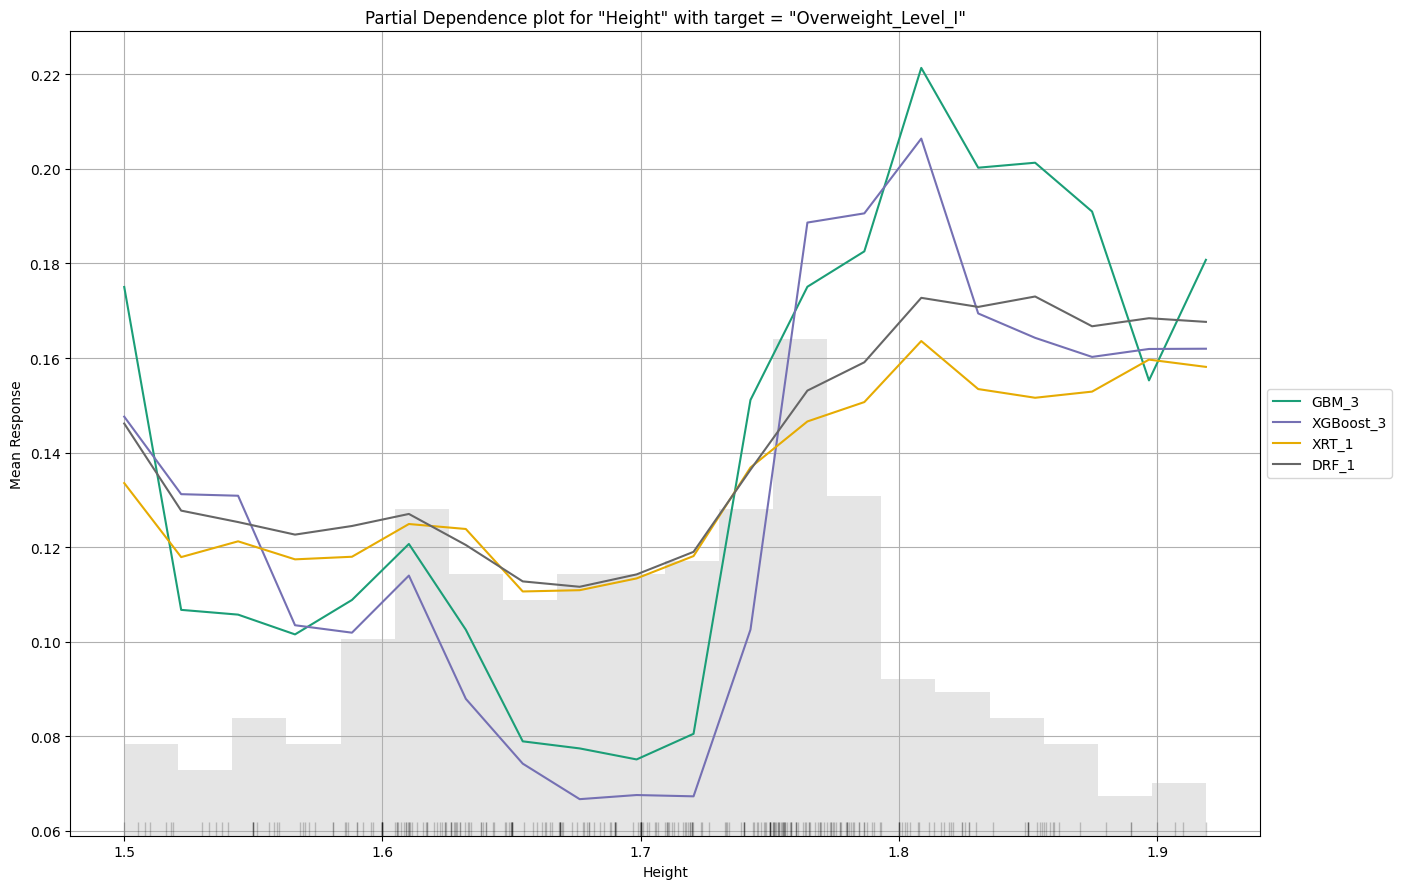

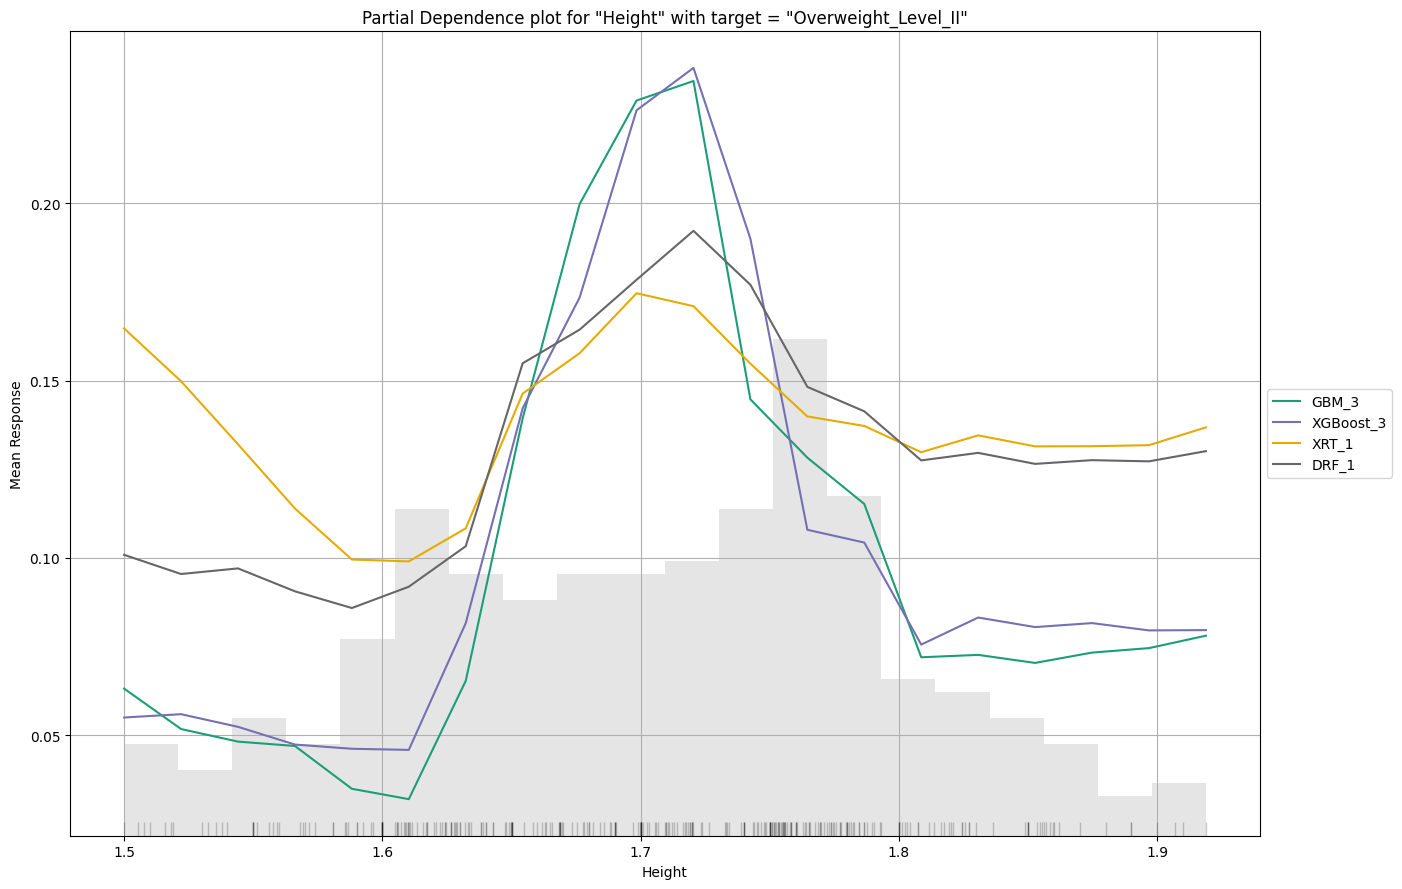

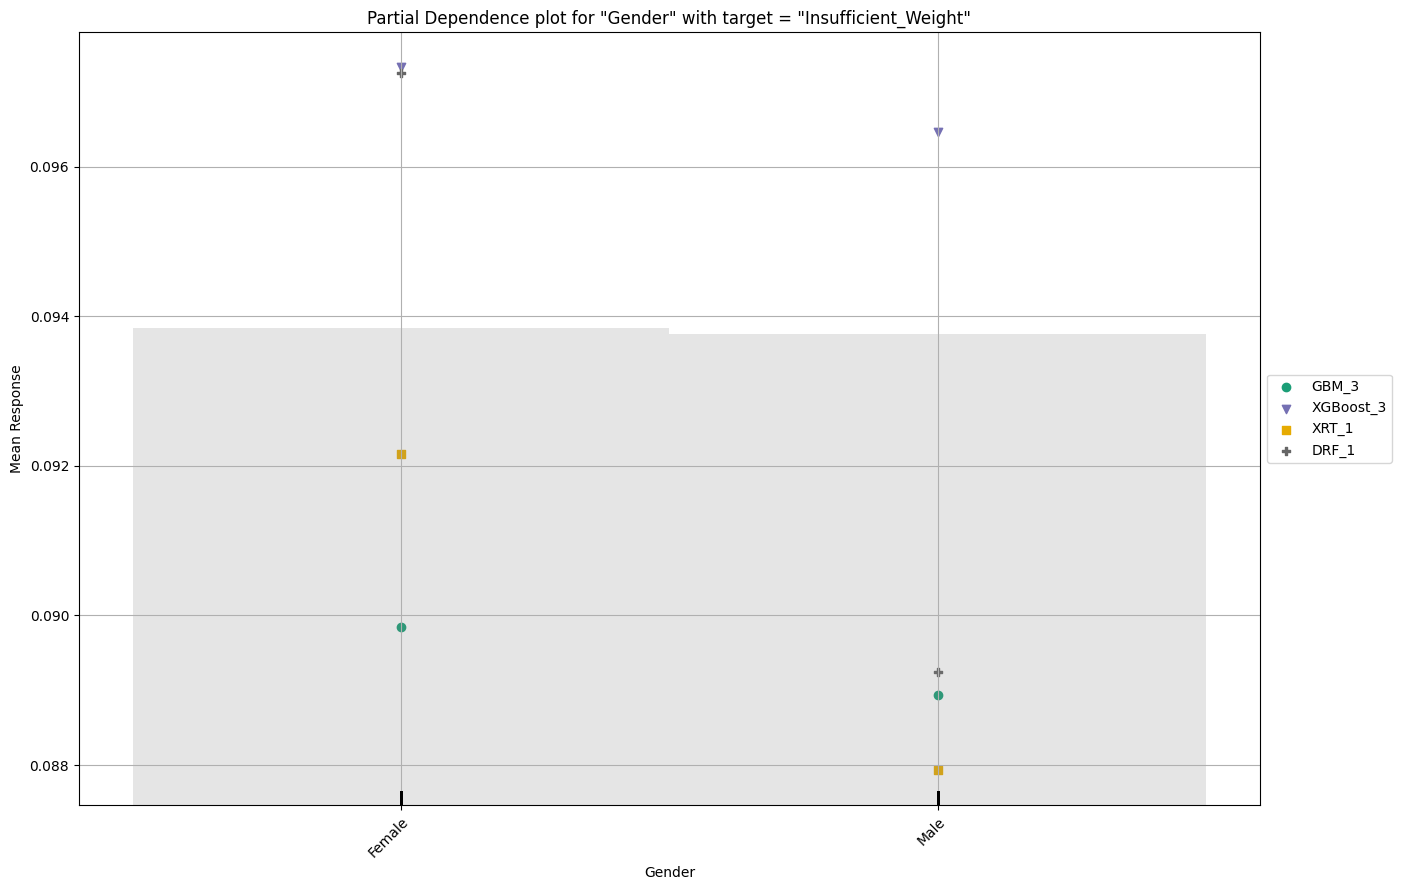

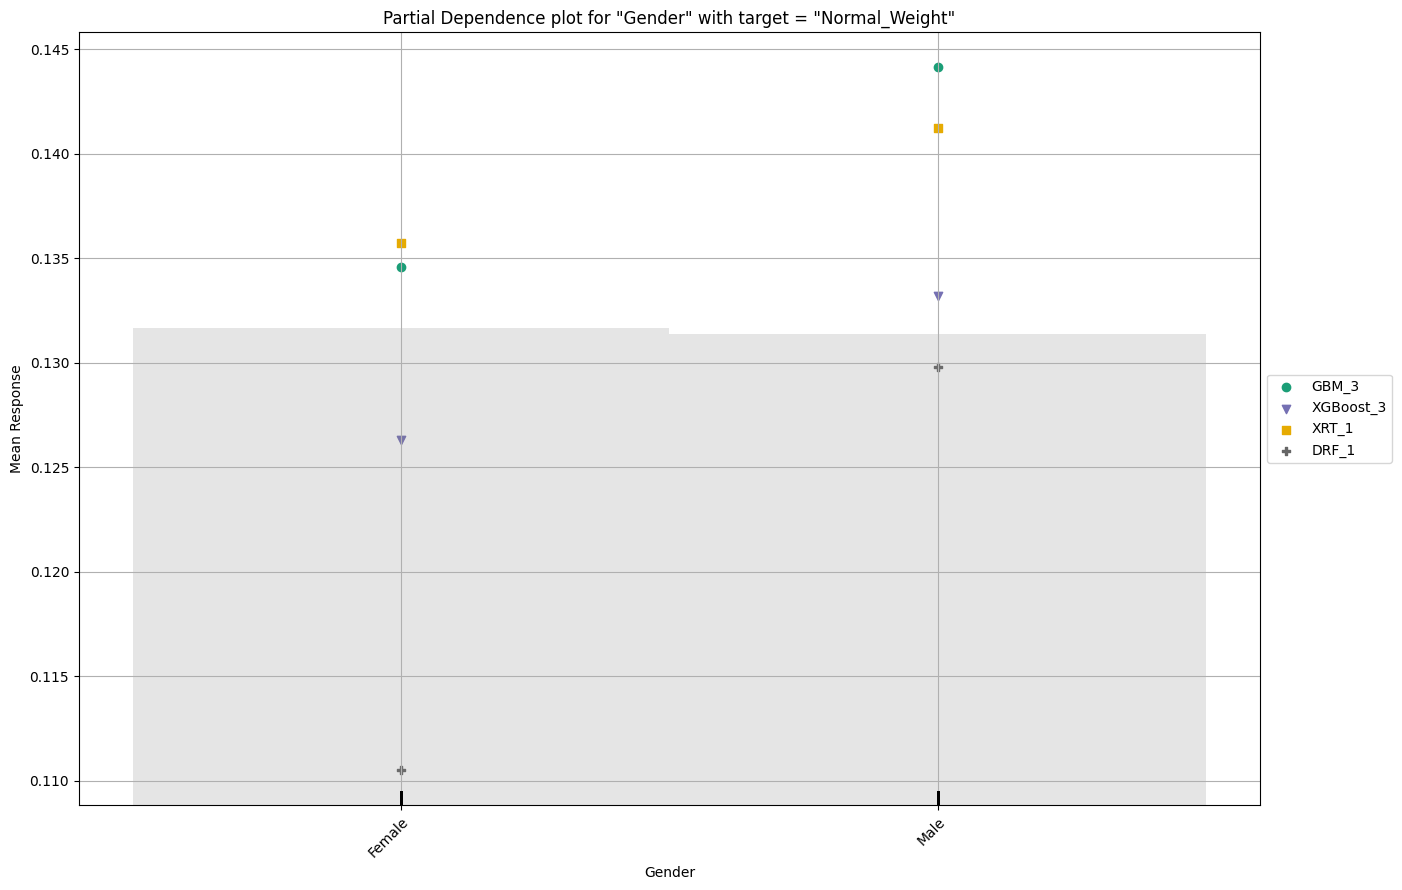

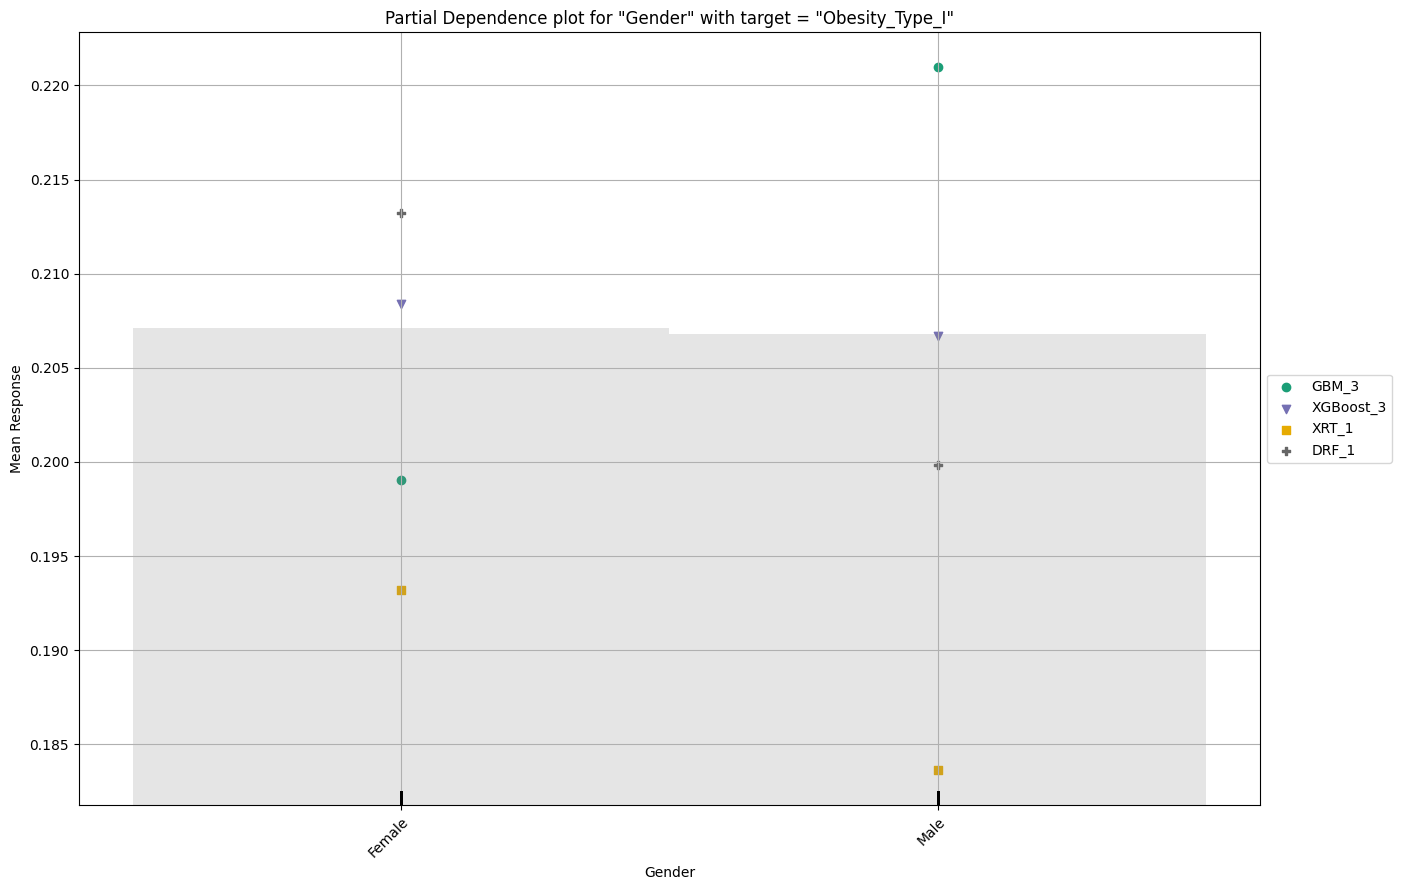

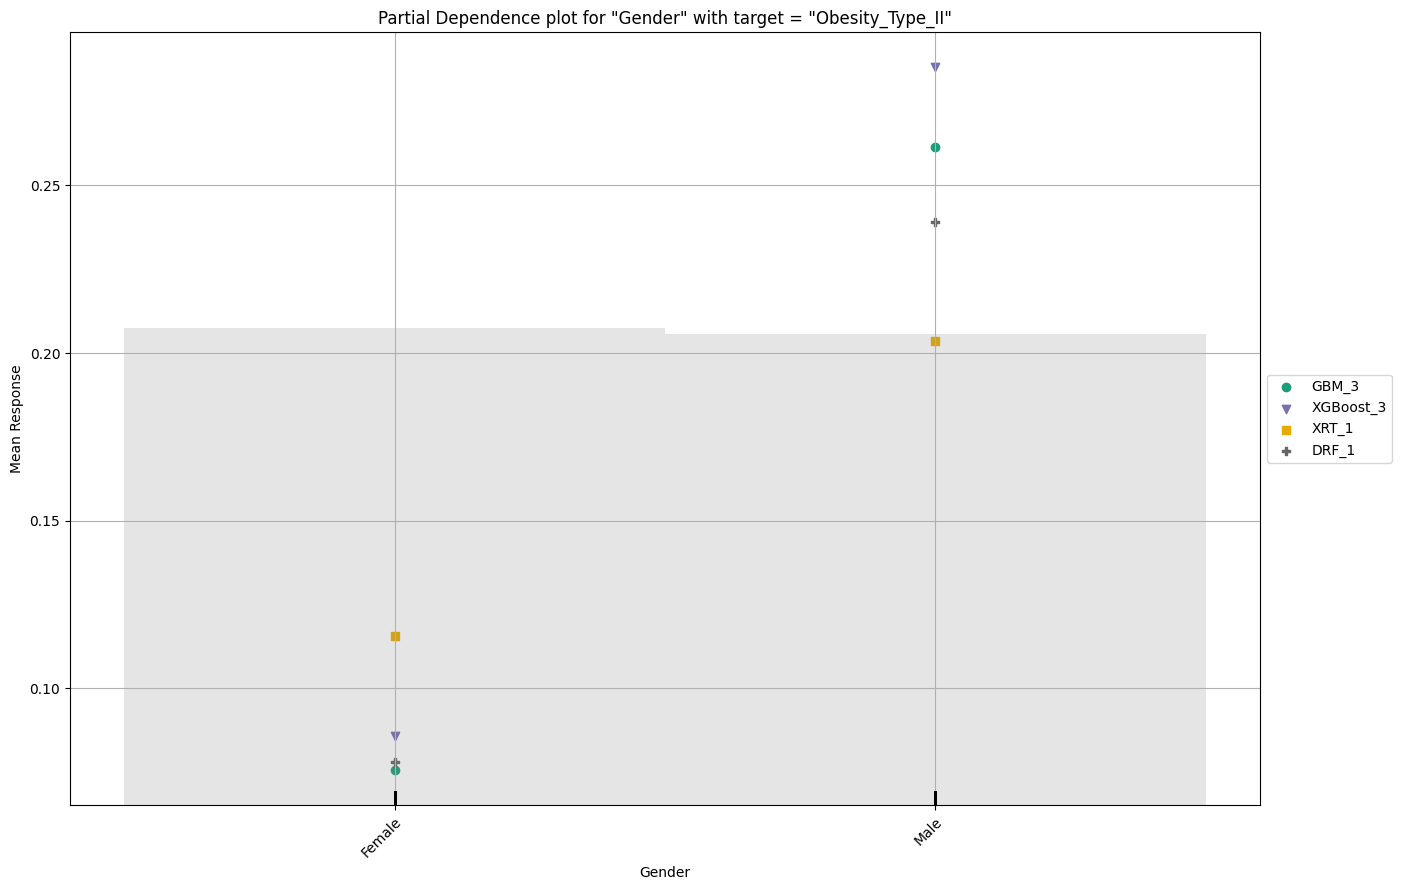

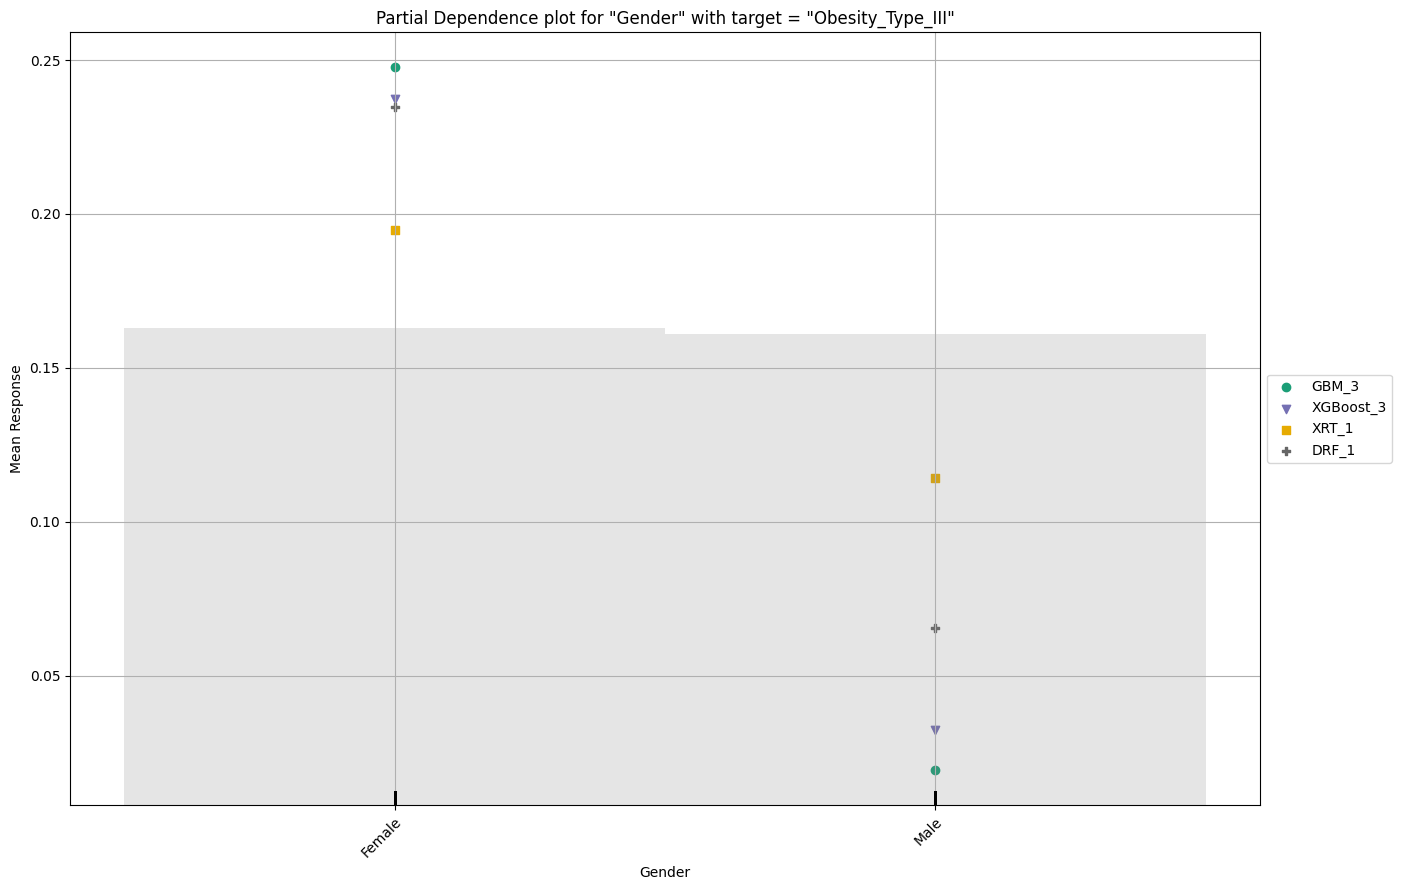

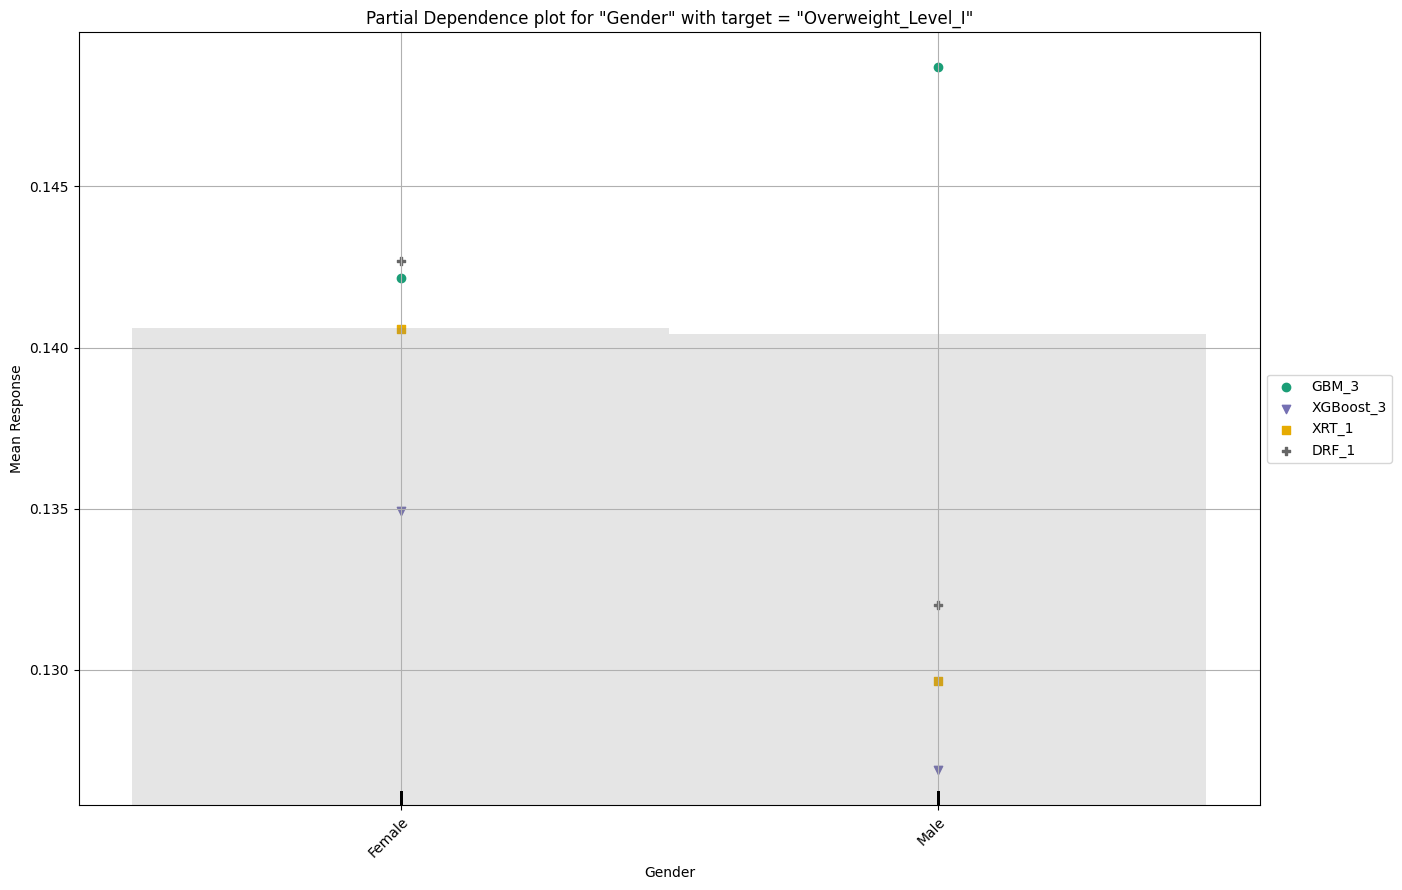

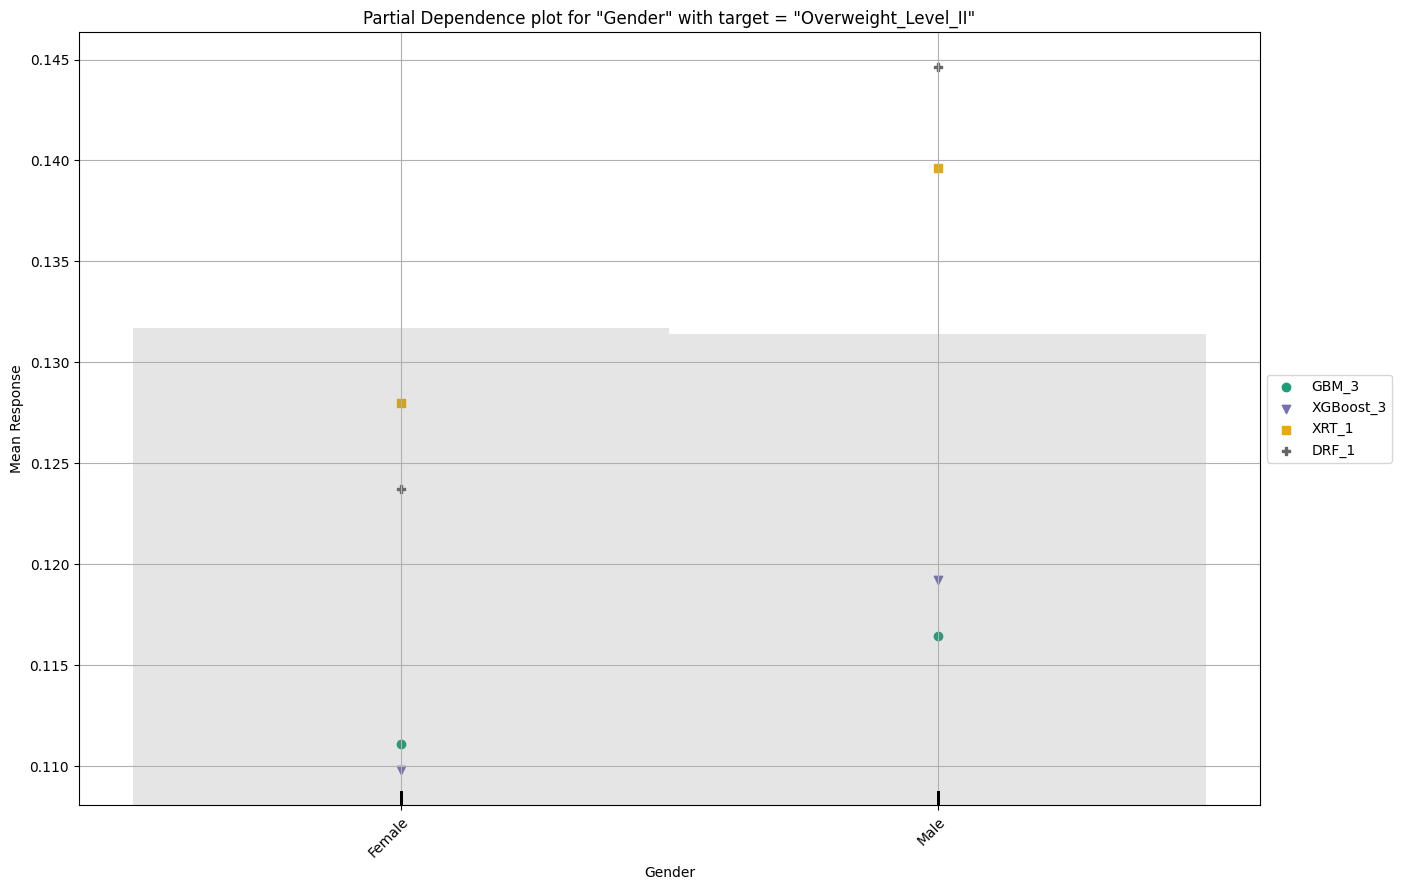

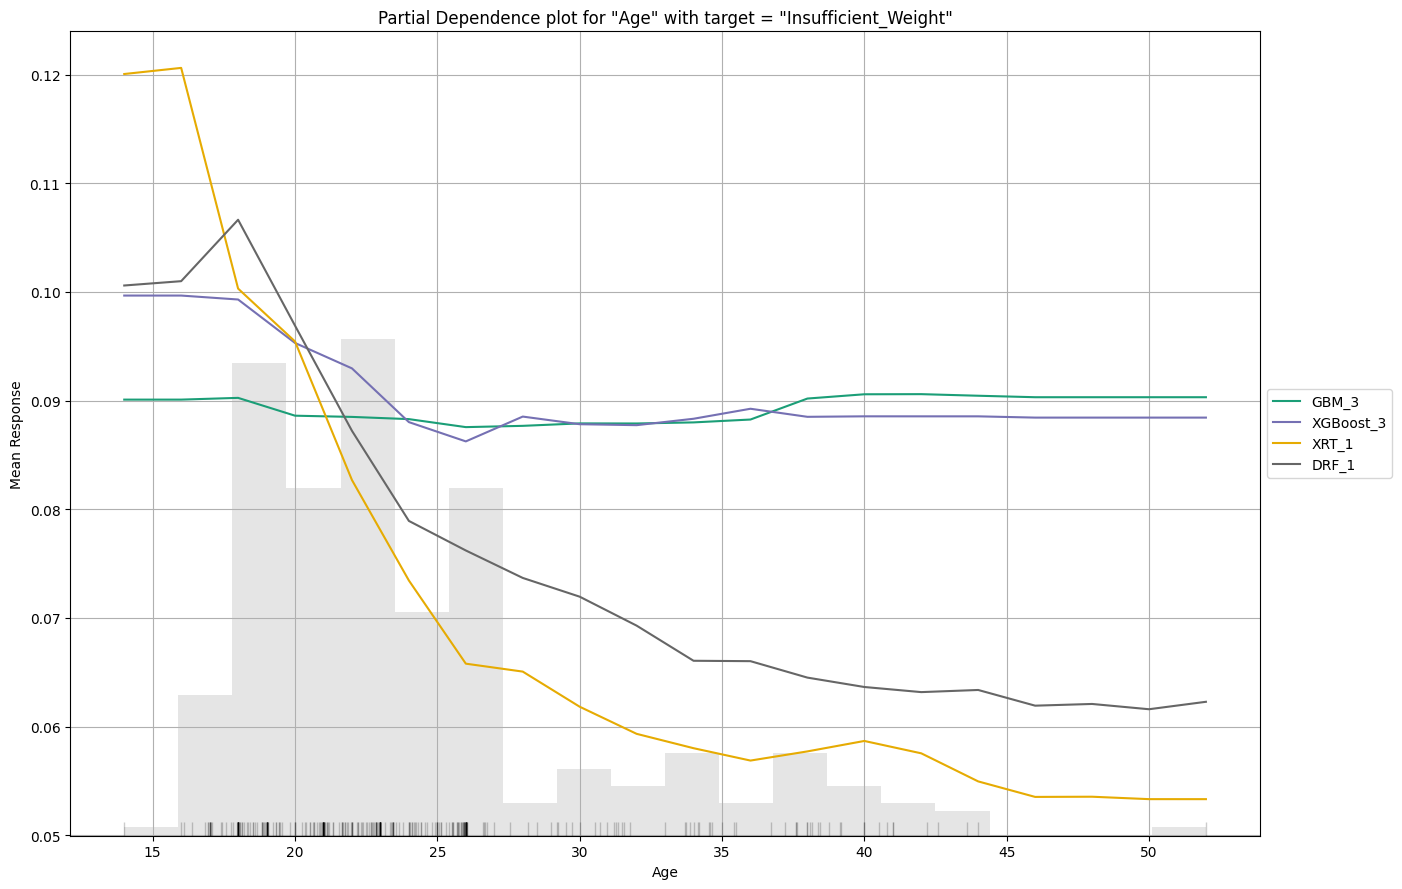

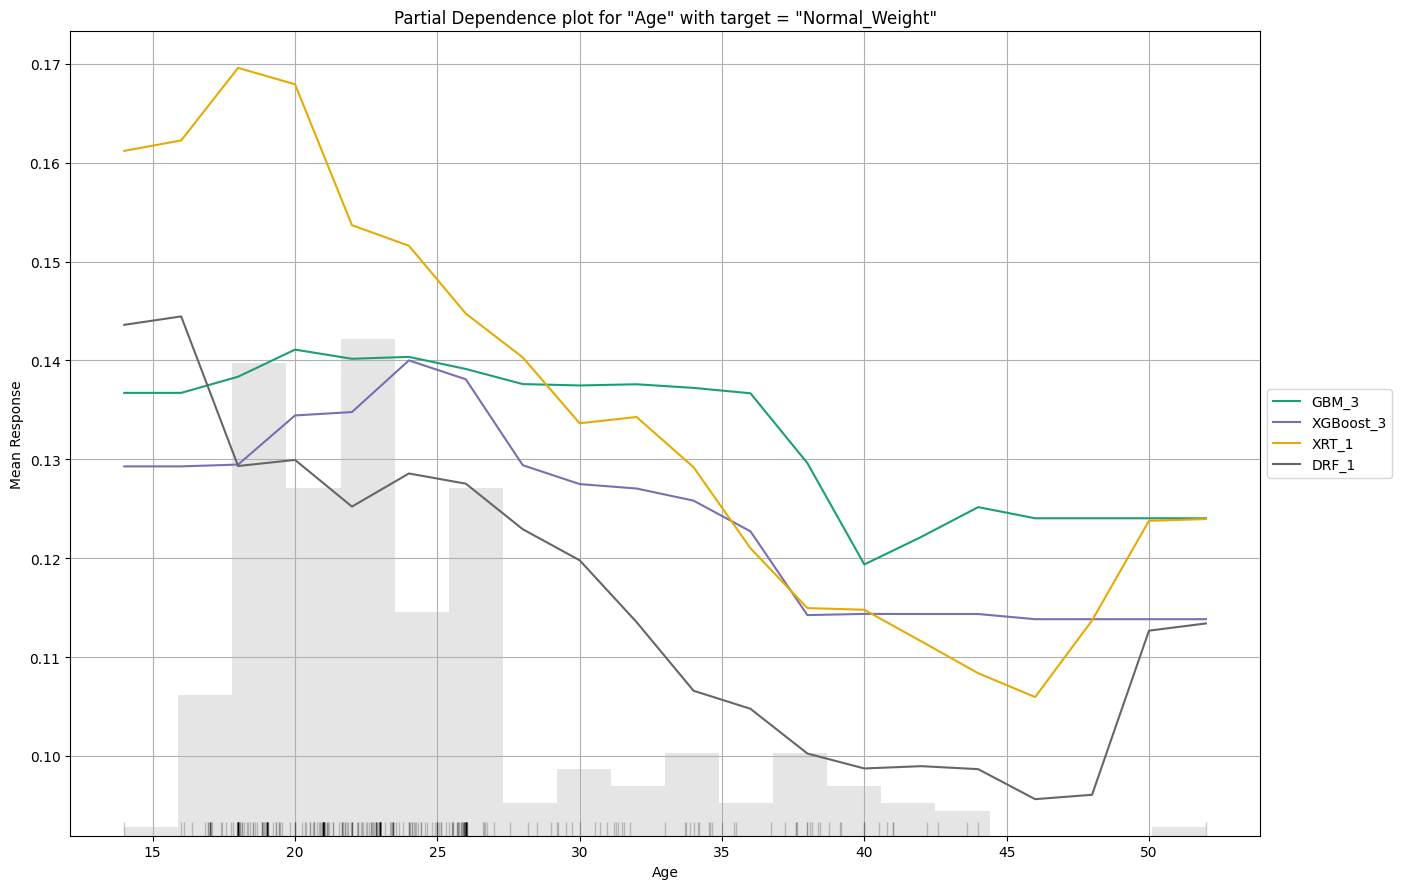

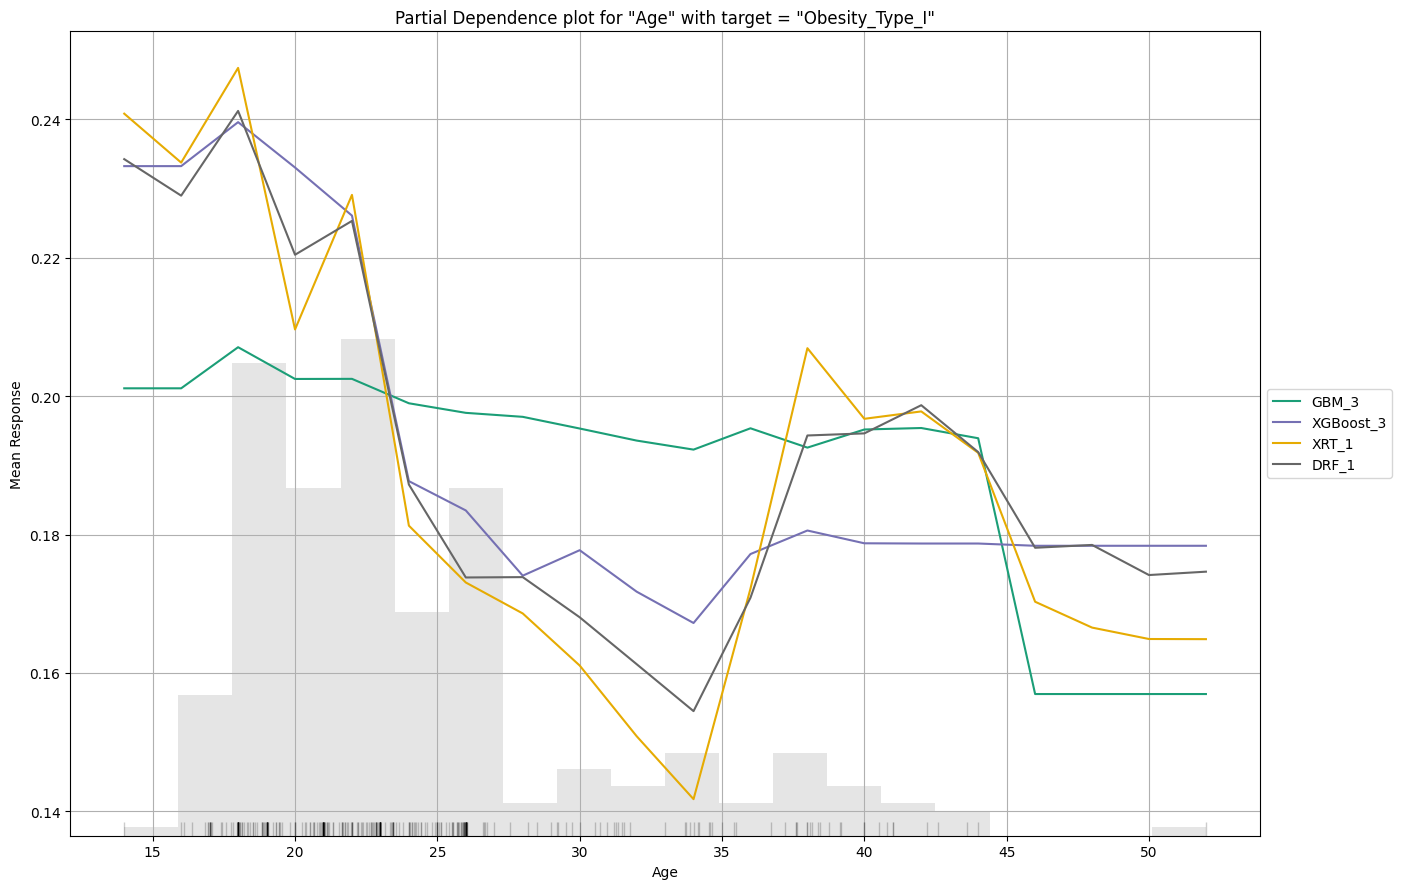

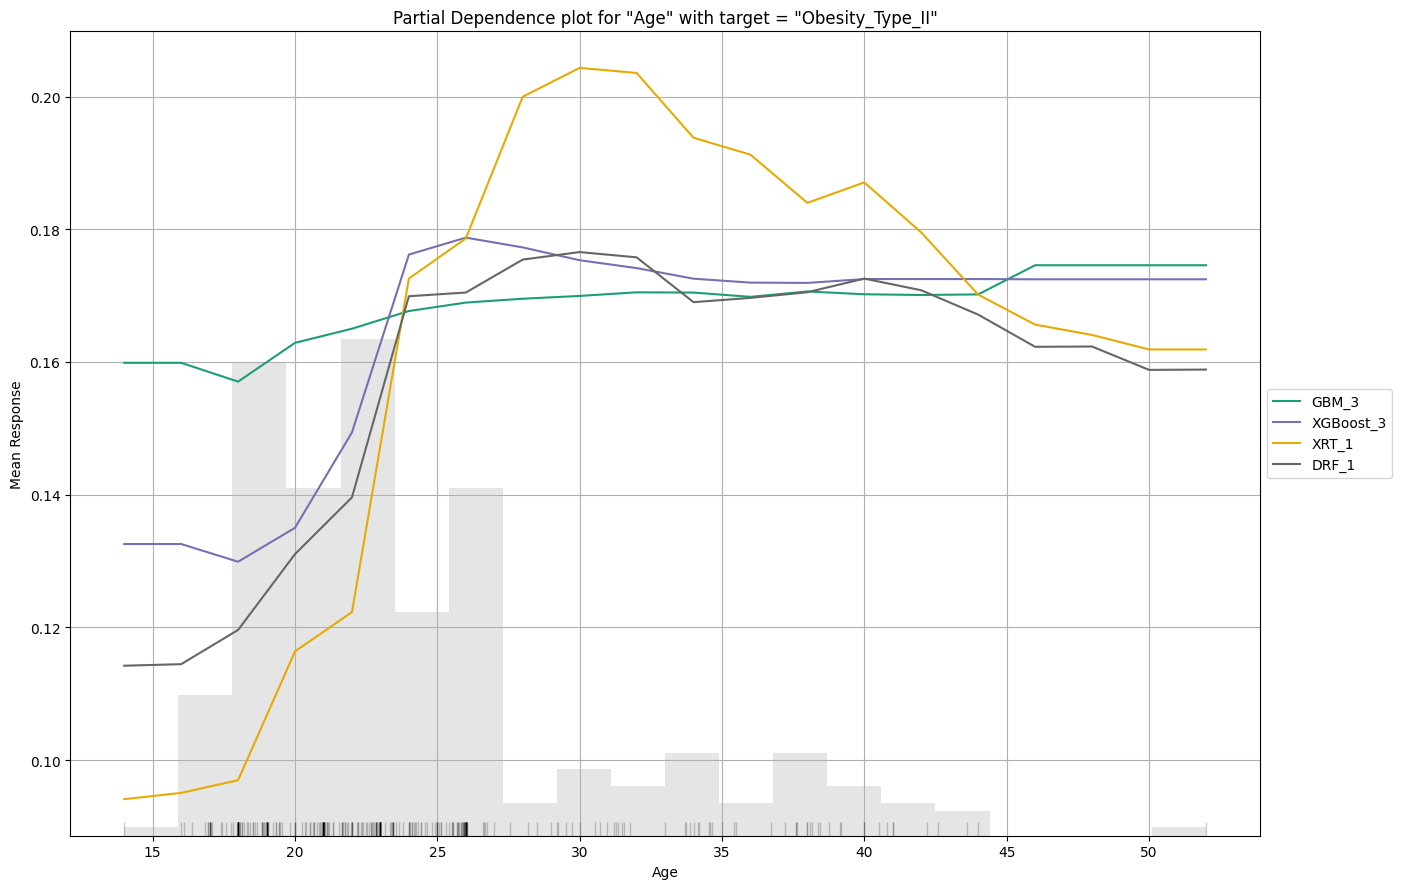

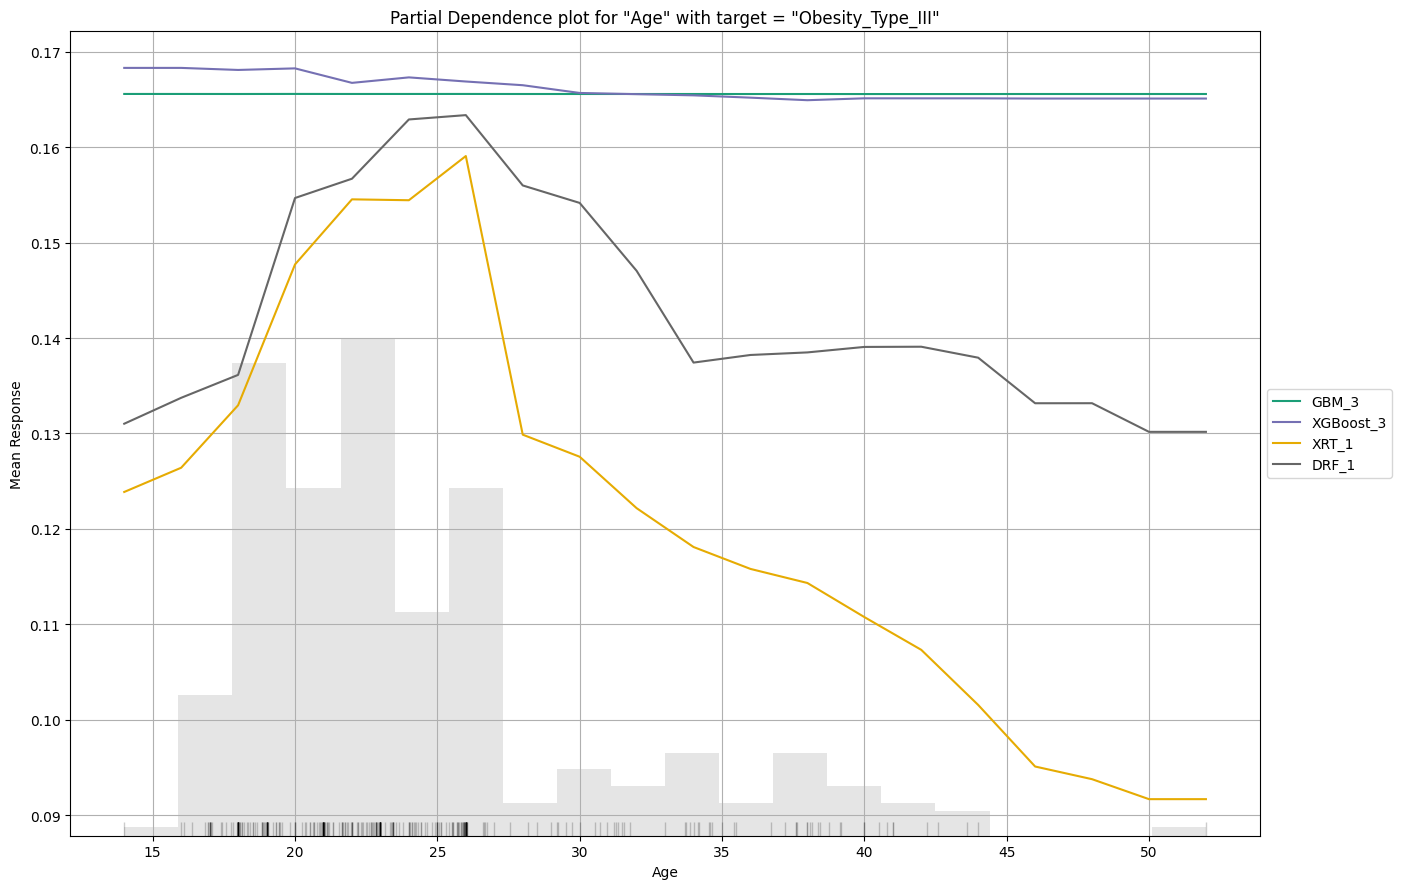

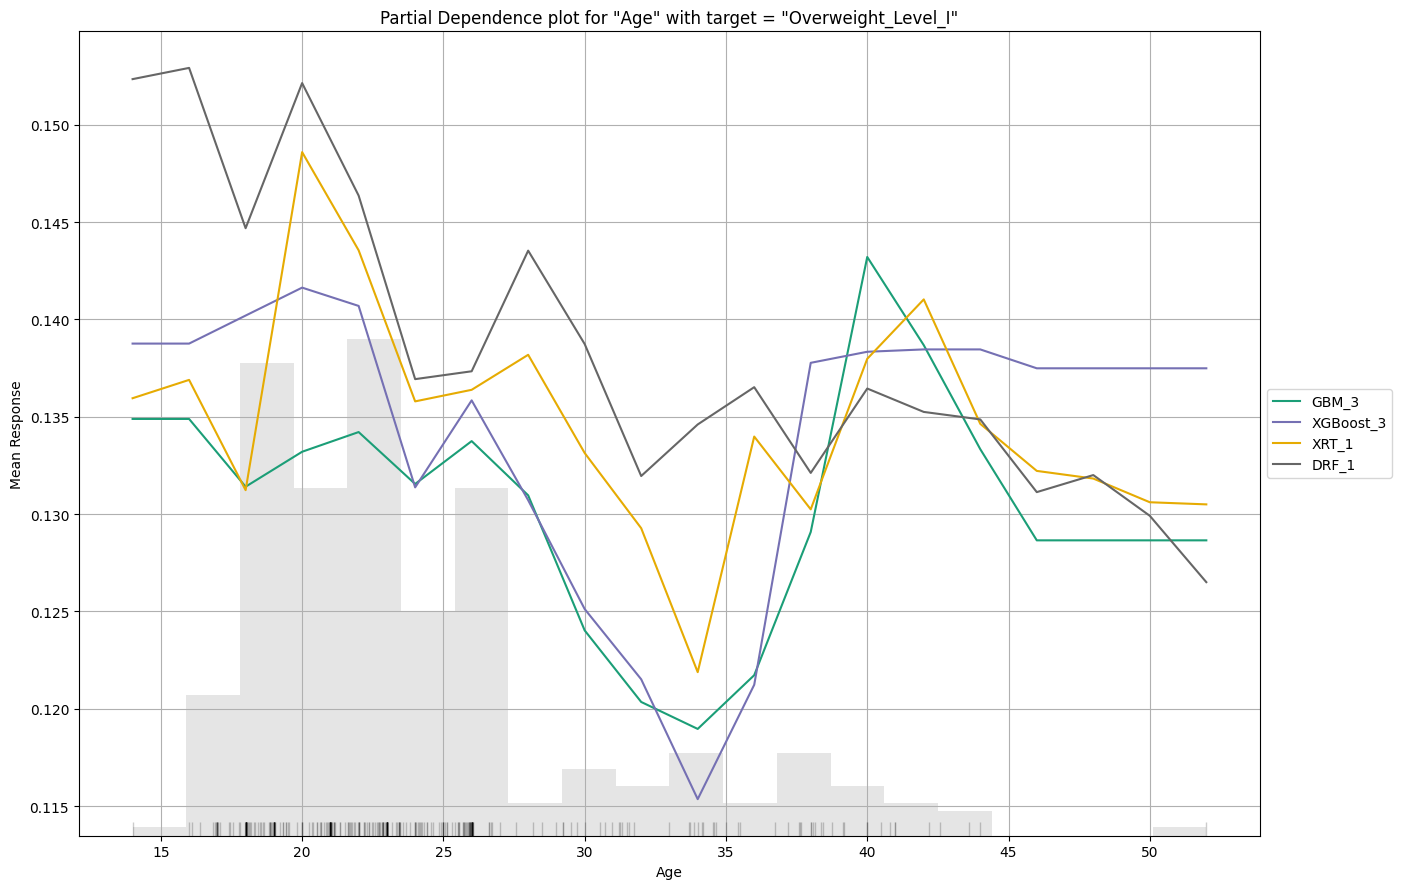

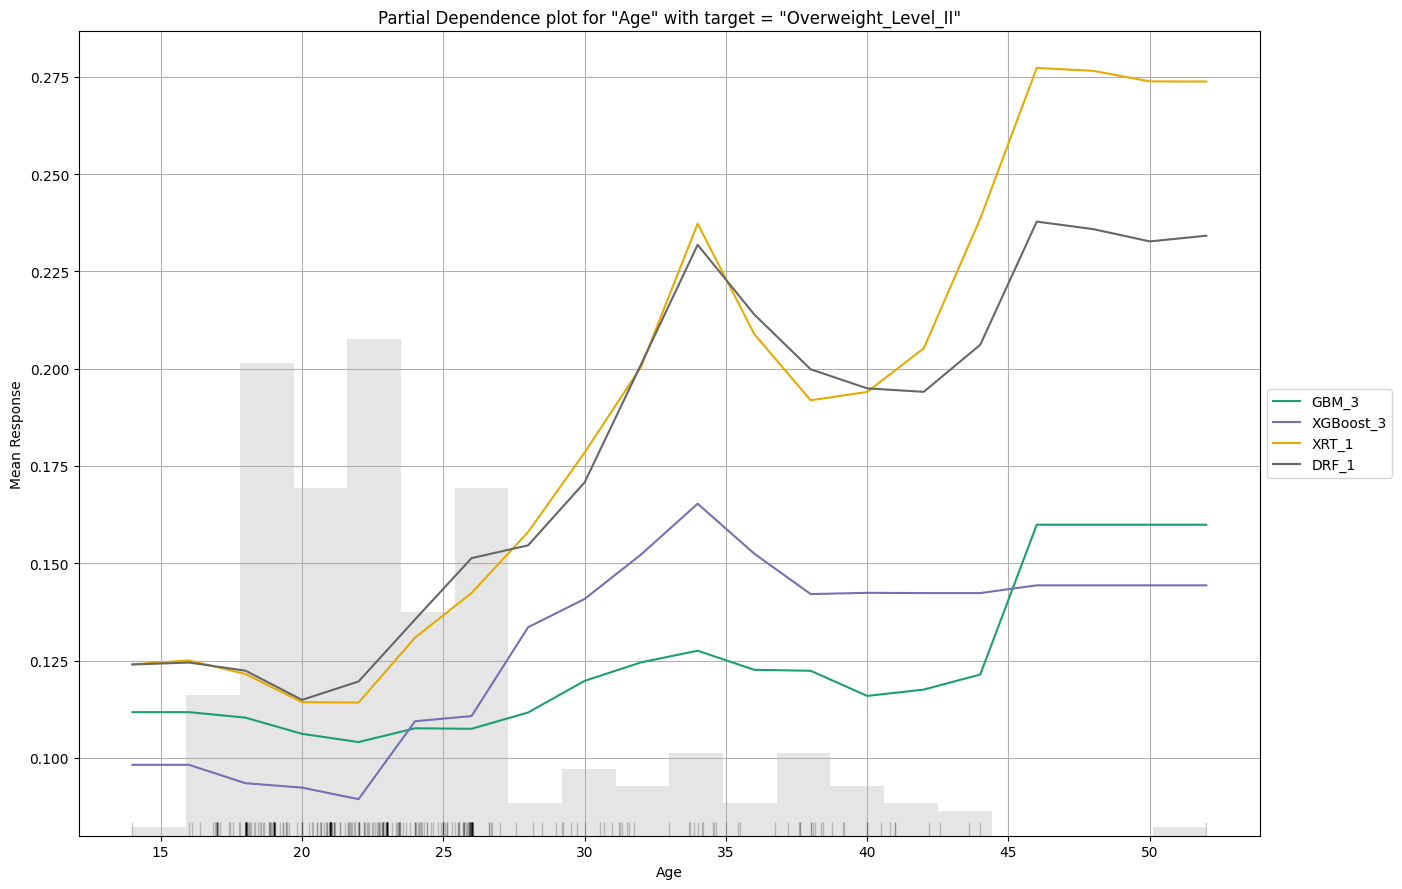

In [ ]:
exa = aml.explain(df_test)

# Conclusion of the H2O AutoML

H20.ai framework was used to train and test the variables of the dataset of Obesity Estimation Data. This gave the best model as ‘gbm’ and accuracy for test data was 89.9%. From the results shown it can be concluded that the proposed model can effectively analyze and predict the level of obesity to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

# Feature Selection, Modeling and Interpretability for the Linear model

Now that we've seen the AutoML modeling, interpretability and feature selection. Let's head for the same using a Linear Model.

In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


from sklearn.pipeline import Pipeline
# import category_encoders as ce

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)


In [ ]:
# storing the data to a dataframe for analysis
from google.colab import drive
drive.mount('/content/gdrive')
obesity = pd.read_csv('/content/gdrive/MyDrive/EDA-Assignment_1/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity

Mounted at /content/gdrive


Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

# Initial Findings of the Data

As you can see, the obesity dataframe contains few categorical columns and numerical columns. In order to properly classify the categorical columns should be turned into a numerical columns for that purpose we'll be using categorical encoders.

In [ ]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

# Data Cleaning

We'll be cleaning the data frame to make sure that there are no null values and duplicate values as it may hinder us from seeing the actual analysis or the truth of the data.

In [ ]:
# Checking for NaN (missing) values
missing_values = obesity.isnull().sum()

# Checking for duplicated rows
duplicates = obesity.duplicated().sum()

print(f"checking missing value\n{missing_values}")
print(f"duplicated values\n{duplicates}")

checking missing value
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
duplicated values
24


In [ ]:
# Removing duplicated rows from the dataset
obesity = obesity.drop_duplicates()
#check if ther is any remining duplicated values
obesity.duplicated().sum()

0

# Reading the Data and Data Analysis

We'll be reading the data into a data frame and see what the data is about and what are the distributions of the individual columns etc.

In [ ]:
# Calling the "Obesity" DataFrame which was already clean with the removal of all the duplicate and null values
obesity


Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2087 rows x 17 columns]

# Encoding Categorical Columns

Since, we've many categorical columns it's wise to turn them into numerical columns by encoding them.

In [ ]:
columns = obesity.columns
categorical_columns = [c for c in columns if obesity[c].dtypes == 'object']
categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
for i in categorical_columns:
    print(f"{i} : {obesity[i].unique()}")

Gender : ['Female' 'Male']
family_history_with_overweight : ['yes' 'no']
FAVC : ['no' 'yes']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


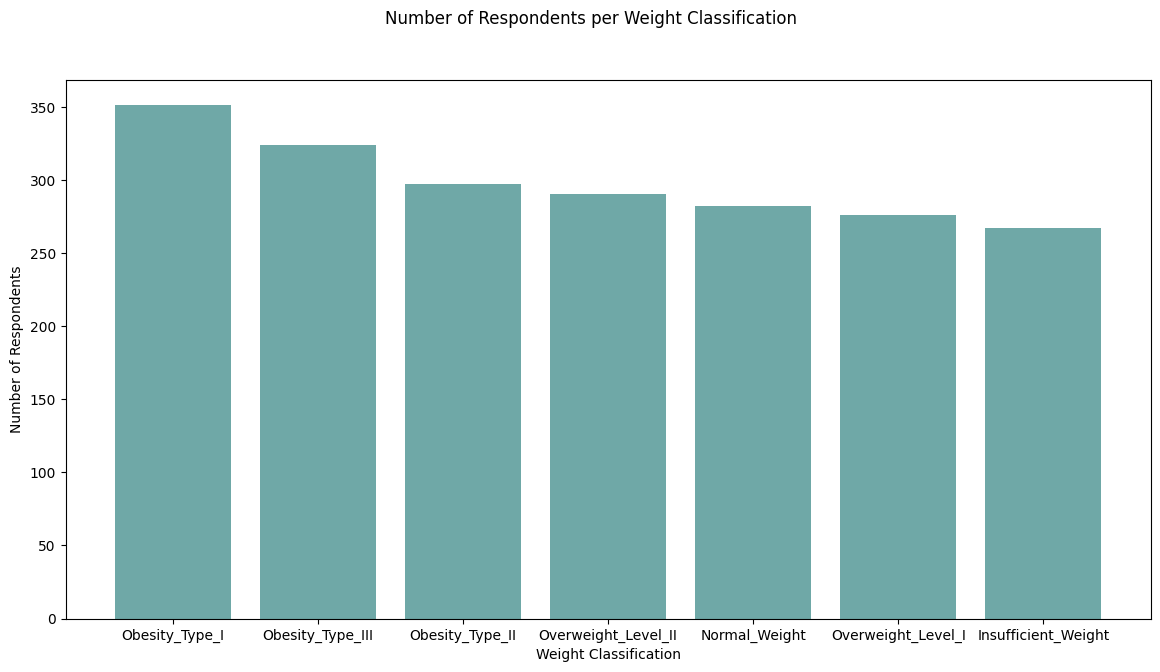

In [ ]:
fig = plt.figure(figsize = (14, 7))
fig.suptitle("Number of Respondents per Weight Classification")

#Count the number of datapoints attributed with each weight category
counts = obesity["NObeyesdad"].value_counts()
plt.bar(counts.index, counts.values, color="#6fa8a7")
plt.xlabel("Weight Classification")
plt.ylabel("Number of Respondents")
plt.show()





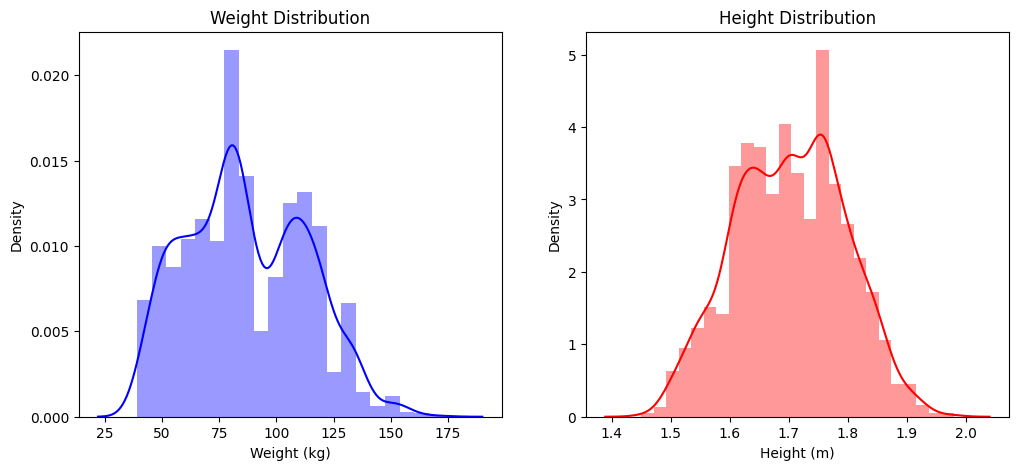

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))

#Weight distributon suplot
plt.subplot(1, 2, 1)
sns.distplot(obesity["Weight"], color="b").set_title('Weight Distribution')
plt.xlabel("Weight (kg)")

#Height distribution subplot
plt.subplot(1, 2, 2)
sns.distplot(obesity["Height"], color="r").set_title('Height Distribution')
plt.xlabel("Height (m)")

plt.show()

<Axes: >

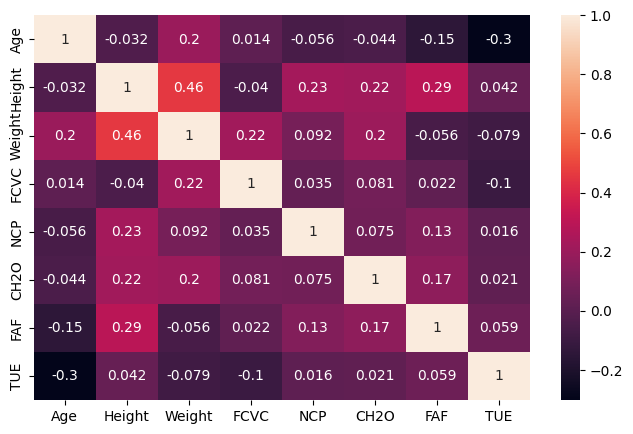

In [ ]:
# Finding the features by heatmap
plt.figure(figsize=(8,5))
sns.heatmap(obesity.corr(), annot = True)

Thus, from the heatmap, we can figure out that "height" and "weight" are two of the most important predictor variables, followed by "FAF", "FCVC" these columns have positive relations whereas TUE etc have negative corelations.

In [ ]:
# Splitting the data into X and y to fit a linear model
X = obesity.iloc[:,:-1]
y = obesity.iloc[:, -1]
y = pd.DataFrame(y, columns=['NObeyesdad'])

In [ ]:
labels = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']

# Create a dictionary to map labels to numbers starting from 1
label_to_number = {label: i + 1 for i, label in enumerate(labels)}

# Map the condition labels to numeric values
y['NObeyesdad'] = y['NObeyesdad'].map(label_to_number)
y.head()

NObeyesdad
0           1
1           1
2           1
3           2
4           3

Gender, FAVC, SMOKE, SCC , family_history_with_overweight (Binary Categories):
These features have only two categories and are best represented by a binary format.

CALC, MTRANS (Multi-Category Nominal):
These features are nominal with no inherent order. One-hot encoding creates new columns indicating the presence of each possible value.

CAEC (Ordinal Category):
If 'CAEC' has an inherent order (e.g., never, sometimes, frequently, always), ordinal encoding can be used, where each category is assigned an integer based on the order.

In [ ]:
# Custom function for binary encoding
def binary_encode(obesity, columns):
    obesity = obesity.copy() #ensure that the function is safe and does not modify the DataFrame passed to it unexpectedly.
    label_encoder = LabelEncoder()
    for col in columns:
        obesity[col] = label_encoder.fit_transform(obesity[col])
    return obesity

# Columns for binary encoding, one-hot encoding, and category encoding
binary_columns = ['Gender', 'FAVC', 'SMOKE', 'SCC', 'family_history_with_overweight']
onehot_encoded_columns = ['CALC', 'MTRANS']
category_encoded_columns = ['CAEC']

# Creating a pipeline for binary encoding
binary_pipeline = Pipeline(steps=[
    ('binary_encode', FunctionTransformer(binary_encode, kw_args={'columns': binary_columns}))
])

# Creating a pipeline for category encoding
category_pipeline = Pipeline(steps=[
    ('category_encode', ce.OrdinalEncoder(cols=category_encoded_columns))
])

# Creating the ColumnTransformer
categorical_transformer = ColumnTransformer(
    transformers=[
        ('binary', binary_pipeline, binary_columns),
        ('onehot', OneHotEncoder(), onehot_encoded_columns),
        ('category', category_pipeline, category_encoded_columns)
    ],
    remainder='passthrough'  # leave the rest of the columns unchanged
)

# Applying the ColumnTransformer to the DataFrame
X_categorical_transformed = categorical_transformer.fit_transform(X)

# Getting new column names
binary_encoded_names = binary_columns  # Binary encoded columns names remain the same
onehot_encoded_names = categorical_transformer.named_transformers_['onehot'].get_feature_names_out(onehot_encoded_columns)
category_encoded_names = categorical_transformer.named_transformers_['category'].get_feature_names_out(category_encoded_columns)

new_columns = binary_encoded_names + list(onehot_encoded_names) + list(category_encoded_names)
new_columns += [col for col in X.columns if col not in binary_columns + onehot_encoded_columns + category_encoded_columns]

# Creating the new DataFrame with the new column names
obesity_encoded_obesity = pd.DataFrame(X_categorical_transformed, columns=new_columns)

obesity_encoded_obesity.head()

Gender  FAVC  SMOKE  SCC  family_history_with_overweight  CALC_Always  \
0     0.0   0.0    0.0  0.0                             1.0          0.0   
1     0.0   0.0    1.0  1.0                             1.0          0.0   
2     1.0   0.0    0.0  0.0                             1.0          0.0   
3     1.0   0.0    0.0  0.0                             0.0          0.0   
4     1.0   0.0    0.0  0.0                             0.0          0.0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  \
0              0.0             0.0      1.0                0.0          0.0   
1              0.0             1.0      0.0                0.0          0.0   
2              1.0             0.0      0.0                0.0          0.0   
3              1.0             0.0      0.0                0.0          0.0   
4              0.0             1.0      0.0                0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  CAEC   Age  \
0               0.0                           1.0             0.0   1.0  21.0   
1               0.0                           1.0             0.0   1.0  21.0   
2               0.0                           1.0             0.0   1.0  23.0   
3               0.0                           0.0             1.0   1.0  27.0   
4               0.0                           1.0             0.0   1.0  22.0   

   Height  Weight  FCVC  NCP  CH2O  FAF  TUE  
0    1.62    64.0   2.0  3.0   2.0  0.0  1.0  
1    1.52    56.0   3.0  3.0   3.0  3.0  0.0  
2    1.80    77.0   2.0  3.0   2.0  2.0  1.0  
3    1.80    87.0   3.0  3.0   2.0  2.0  0.0  
4    1.78    89.8   2.0  1.0   2.0  0.0  0.0

In [ ]:
obesity_encoded_obesity.describe()

Gender         FAVC        SMOKE          SCC  \
count  2087.000000  2087.000000  2087.000000  2087.000000   
mean      0.504073     0.883565     0.021083     0.045999   
std       0.500103     0.320823     0.143695     0.209533   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000   
50%       1.000000     1.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000   

       family_history_with_overweight  CALC_Always  CALC_Frequently  \
count                     2087.000000  2087.000000      2087.000000   
mean                         0.825108     0.000479         0.033541   
std                          0.379966     0.021890         0.180088   
min                          0.000000     0.000000         0.000000   
25%                          1.000000     0.000000         0.000000   
50%                          1.000000     0.000000         0.000000   
75%                          1.000000     0.000000         0.000000   
max                          1.000000     1.000000         1.000000   

       CALC_Sometimes      CALC_no  MTRANS_Automobile  MTRANS_Bike  \
count     2087.000000  2087.000000        2087.000000  2087.000000   
mean         0.661236     0.304744           0.218495     0.003354   
std          0.473403     0.460409           0.413324     0.057831   
min          0.000000     0.000000           0.000000     0.000000   
25%          0.000000     0.000000           0.000000     0.000000   
50%          1.000000     0.000000           0.000000     0.000000   
75%          1.000000     1.000000           0.000000     0.000000   
max          1.000000     1.000000           1.000000     1.000000   

       MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  \
count       2087.000000                   2087.000000     2087.000000   
mean           0.005271                      0.746526        0.026354   
std            0.072426                      0.435104        0.160223   
min            0.000000                      0.000000        0.000000   
25%            0.000000                      0.000000        0.000000   
50%            0.000000                      1.000000        0.000000   
75%            0.000000                      1.000000        0.000000   
max            1.000000                      1.000000        1.000000   

              CAEC          Age       Height       Weight         FCVC  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean      1.217058    24.353090     1.702674    86.858730     2.421466   
std       0.572070     6.368801     0.093186    26.190847     0.534737   
min       1.000000    14.000000     1.450000    39.000000     1.000000   
25%       1.000000    19.915937     1.630178    66.000000     2.000000   
50%       1.000000    22.847618     1.701584    83.101100     2.396265   
75%       1.000000    26.000000     1.769491   108.015907     3.000000   
max       4.000000    61.000000     1.980000   173.000000     3.000000   

               NCP         CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  2087.000000  
mean      2.701179     2.004749     1.012812     0.663035  
std       0.764614     0.608284     0.853475     0.608153  
min       1.000000     1.000000     0.000000     0.000000  
25%       2.697467     1.590922     0.124505     0.000000  
50%       3.000000     2.000000     1.000000     0.630866  
75%       3.000000     2.466193     1.678102     1.000000  
max       4.000000     3.000000     3.000000     2.000000

In [ ]:
print(len(obesity_encoded_obesity), len(y))

2087 2087


In [ ]:
#Performing a Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(obesity_encoded_obesity, y, test_size=0.25, random_state=42)

# Evaluating the linear model

Since linear regression is out of question as there are multiple independent values and only one dependent values. We'll be going through with logistic regression.

In [ ]:
lr = LogisticRegression(max_iter=1000)

**Fitting the model**



In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

**Model accuracy**
A model's accuracy is the proportion of classes that the model correctly predicts. is Compute and print the accuracy of lr by using the .score() method.

In [ ]:
print(lr.score(X_train,y_train))

0.8306709265175719


# Sequential Forward Selection

It's time to select the features

In [ ]:
sfs = SFS(lr,
         k_features=10,
         forward = True,
         floating=False,
         cv=0,
         scoring='accuracy')

In [ ]:
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(10, 10), scoring='accuracy')

In [ ]:
print(sfs.subsets_[10])

{'feature_idx': (0, 1, 5, 6, 8, 9, 11, 15, 16, 17), 'cv_scores': array([0.83450479]), 'avg_score': 0.8345047923322684, 'feature_names': ('Gender', 'FAVC', 'CALC_Always', 'CALC_Frequently', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Motorbike', 'Age', 'Height', 'Weight')}


In [ ]:
# Print the chosen feature names
print(print(sfs.subsets_[10]['feature_names']))
# Print the accuracy of the model after sequential forward selection
print(sfs.subsets_[10]['avg_score'])

('Gender', 'FAVC', 'CALC_Always', 'CALC_Frequently', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Motorbike', 'Age', 'Height', 'Weight')
None
0.8345047923322684


<Figure size 2000x3000 with 0 Axes>

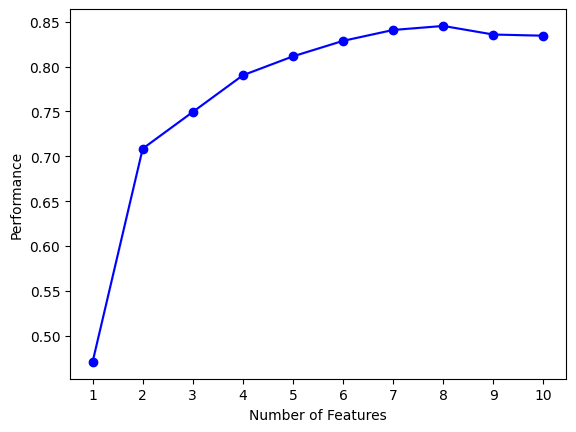

In [ ]:
%matplotlib inline

plt.figure(figsize=(20, 30))  # Define the figure size before plotting
plot_sfs(sfs.get_metric_dict())  # Your plotting function should come after setting the figure size
plt.show()

# Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for Grid Search
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'max_iter': [100, 200, 500, 1000]}

In [ ]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
# Best parameters
best_params = grid_search.best_params_

# Initialize the logistic regression model with the best parameters
best_lr = LogisticRegression(**best_params)

# Cross-validation scores
cross_val_scores = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='accuracy')

# Print the best parameters and cross-validation scores
print("Best Parameters:", best_params)
print("Cross-Validation Accuracy Scores:", cross_val_scores)

Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
Cross-Validation Accuracy Scores: [0.85303514 0.85942492 0.84345048 0.86900958 0.86900958]


In [ ]:
# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cross_val_scores.mean()
std_cv_score = cross_val_scores.std()

# Print mean and standard deviation
print(f"Mean Cross-Validation Accuracy: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_cv_score}")

# Retrain the model on the entire dataset
best_lr.fit(obesity_encoded_obesity, y)

# If you have a separate test set, evaluate the model on it
# test_accuracy = best_lr.score(X_test, y_test) # Uncomment if you have a test set

# Final model evaluation
final_accuracy = best_lr.score(X_test, y_test)

# Print the final model accuracy
print(f"Final Model Accuracy on Training Data: {final_accuracy}")

Mean Cross-Validation Accuracy: 0.8587859424920128
Standard Deviation of Cross-Validation Accuracy: 0.009774478300816836
Final Model Accuracy on Training Data: 0.8620689655172413


In [ ]:
best_lr

LogisticRegression(C=100, max_iter=1000)

# Using SHAP analysis on Linear Model


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.2 MB/s eta 0:00:00


  0%|          | 0/522 [00:00<?, ?it/s]

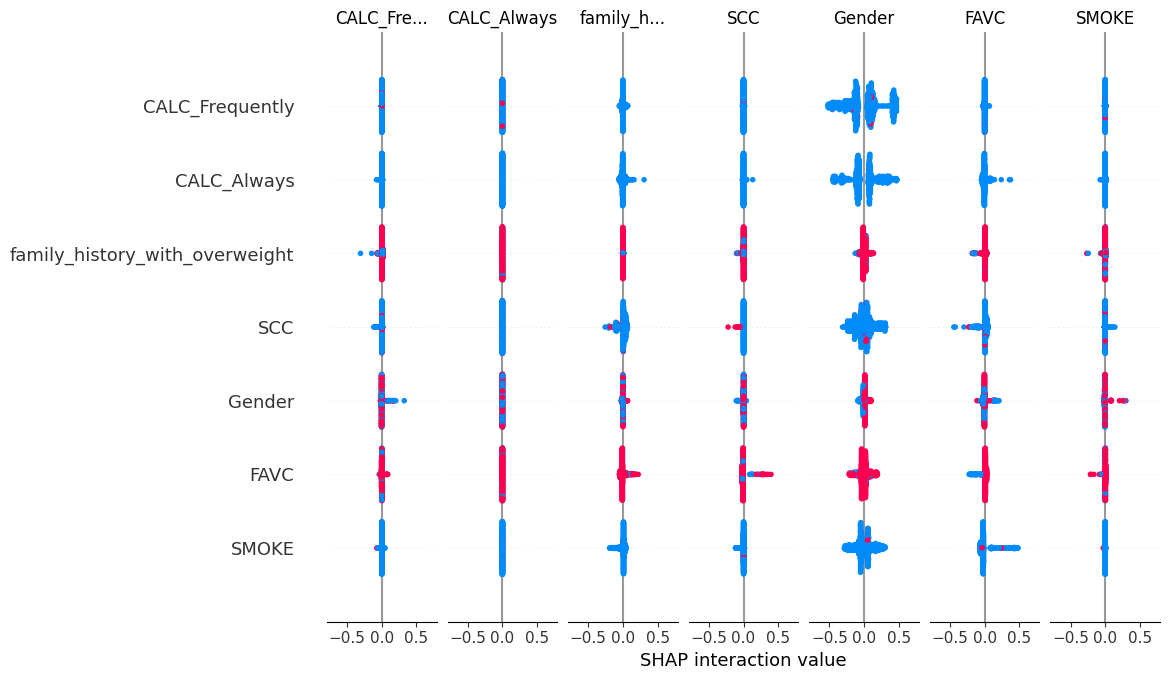

In [ ]:
import shap
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Create the SHAP explainer using the test data
lr_explainer = shap.KernelExplainer(lr.predict_proba, X_test)

# Calculate SHAP values on the test data
shap_values = lr_explainer.shap_values(X_test)

# Generate SHAP summary plot for feature importance insights
shap.summary_plot(shap_values, X_test)  # Visualize feature importance





# Interpreting the SHAP values for Linear Model

Important Features:

Age: The age feature seems to have the strongest positive impact on the model's predictions. This suggests that as the value of age increases, the model is more likely to predict a positive outcome (potentially indicating obesity).
Gender: Gender also appears to be an influential feature. The impact seems to vary depending on the specific gender value (possibly male or female). A positive SHAP value for a particular gender indicates it leans towards a positive prediction (obesity), while a negative value leans towards a negative prediction (not obese).
TUE: The TUE feature has a noticeable impact, with both positive and negative values. This suggests TUE interacts with other features in the model's decision-making process. A positive SHAP value for a particular TUE value indicates it contributes to a positive prediction, and vice versa.
Other Features:

The remaining features (FCVC, NCP, CH2O, FAF) appear to have less prominent but potentially still influential effects on the model's predictions. Their impact seems to vary depending on the specific feature value and how they interact with other features.

# Fitting Tree based model and interpreting the nodes


In [ ]:
# Importing the required libraries again!

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score




In [ ]:
pip install scikit-plot

In [ ]:
# storing the data to a dataframe for analysis
from google.colab import drive
drive.mount('/content/gdrive')
obesity_data = pd.read_csv('/content/gdrive/MyDrive/EDA-Assignment_1/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity_data

In [ ]:
obesity_data.head()

In [ ]:
obesity_data.shape

# EDA for tree model


In [ ]:
obesity_data.info()

In [ ]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.

    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()),
                    ha = "center", va = "top", color = "white", size = 10)

    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

In [ ]:
count_values(obesity_data, "Gender")

In [ ]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.

    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")

    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")

    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [ ]:
obesity_data["Age"].describe()

In [ ]:
obesity_data["Age"].median()

In [ ]:
plot_distribution(obesity_data, "Age")

In [ ]:
plot_distribution(obesity_data, "Height")

In [ ]:
plot_distribution(obesity_data, "Weight")

In [ ]:
plt.scatter(obesity_data["Height"], obesity_data["Weight"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height"], obesity_data["Weight"], 1)
plt.plot(obesity_data["Height"], m * obesity_data["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

In [ ]:
count_values(obesity_data, "family_history_with_overweight")

In [ ]:
count_values(obesity_data, "FAVC")

In [ ]:
plt.figure(figsize = (12, 5))
count_values(obesity_data, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [ ]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.

    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """

    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")

    plt.show()

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [ ]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

In [ ]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in obesity_numeric.items():
    sns.boxplot(y = k, data = obesity_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(obesity_data.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2,
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

# Encoding features


In [ ]:
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [ ]:
obesity_lab = obesity_data[["NObeyesdad"]]

In [ ]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [ ]:
obesity_concatenated.head()

In [ ]:
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)

In [ ]:
obesity_label

In [ ]:
obesity_features.info()

In [ ]:
obesity_features = obesity_features.astype("float")

In [ ]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)

In [ ]:
obesity_features_scaled.min(axis = 1), obesity_features_scaled.max(axis = 1)

In [ ]:
encoder = LabelEncoder()

In [ ]:
encoder.fit(obesity_label)

In [ ]:
list(encoder.classes_)

In [ ]:
obesity_labels_encoded = encoder.transform(obesity_label)

In [ ]:
obesity_labels_encoded

**Train -test split**

In [ ]:
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(
                obesity_features, obesity_labels_encoded,
                test_size = 0.2, stratify = obesity_labels_encoded,
                random_state = 42) # shuffle=True

In [ ]:
obesity_features_tr.shape, obesity_labels_tr.shape, obesity_features_ts.shape, obesity_labels_ts.shape

In [ ]:
Counter(obesity_labels_tr)

In [ ]:
Counter(obesity_labels_ts)

# Train model to classify data into obesity categories


In [ ]:
f1 = make_scorer(f1_score, average = "weighted")

In [ ]:
params = {
    "max_depth": [5, 7, 9, 11, 13, 15]
}

In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5, scoring = f1)

In [ ]:
grid_search.fit(obesity_features_tr, obesity_labels_tr)

In [ ]:
grid_search.cv_results_

In [ ]:
grid_search.best_params_

**Evaluate and train model**

In [ ]:
model_tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

In [ ]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predict classes and computes accuracy and f1 score.

    Parameters: estimator, X_train, y_train, X_test, y_test.
    """
    estimator.fit(train_features, train_labels)

    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    print(f"F1 score on Train data: {f1_score(train_labels, estimator.predict(train_features), average = 'weighted')}")
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")

In [ ]:
train_predict_score(model_tree, obesity_features_tr, obesity_labels_tr, obesity_features_ts, obesity_labels_ts)

In [ ]:
plt.figure(figsize = (22, 6))
plot_tree(model_tree, max_depth = 2)
plt.show()

In [ ]:
print(classification_report(obesity_labels_ts, model_tree.predict(obesity_features_ts)))

In [ ]:
model_tree.classes_

In [ ]:
list(encoder.classes_)

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(obesity_labels_ts, model_tree.predict(obesity_features_ts)),
           annot = True,
           fmt = ".0f",
           cmap = "Blues_r",
           linewidths = 2,
           linecolor = "white",
           xticklabels = model_tree.classes_,
           yticklabels = model_tree.classes_)
plt.show()

In [ ]:
obesity_score_probability = model_tree.predict_proba(obesity_features_ts)

In [ ]:
obesity_score_probability

In [ ]:
roc_auc_score(obesity_labels_ts, obesity_score_probability, multi_class = "ovr")

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc(obesity_labels_ts, obesity_score_probability)
plt.show()

# Running SHAP analysis on the Tree model



In [ ]:
import shap
from sklearn.metrics import accuracy_score, f1_score

def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predicts classes, computes accuracy and F1 score, and performs SHAP analysis.

    Parameters: estimator, train_features, train_labels, test_features, test_labels.
    """
    # Train the model
    estimator.fit(train_features, train_labels)

    # Print accuracy and F1 scores on train data
    train_pred = estimator.predict(train_features)
    print(f"Accuracy on Train data: {accuracy_score(train_labels, train_pred)}")
    print(f"F1 score on Train data: {f1_score(train_labels, train_pred, average='weighted')}")

    # Print accuracy and F1 scores on test data
    test_pred = estimator.predict(test_features)
    print(f"Accuracy on Test data: {accuracy_score(test_labels, test_pred)}")
    print(f"F1 on Test data: {f1_score(test_labels, test_pred, average='weighted')}")

    # Calculate SHAP values
    explainer = shap.TreeExplainer(estimator)
    shap_values = explainer.shap_values(test_features)

    # Generate SHAP summary plot for feature importance insights
    shap.summary_plot(shap_values, test_features)


In [ ]:

model_tree = DecisionTreeClassifier(max_depth=13, random_state=42)
train_predict_score(model_tree, X_train, y_train, X_test, y_test)



# Interpreting the SHAP results of Tree model

Here’s what we can infer from the plot:

For people with no family history of overweight (the leftmost section of the plot), there is a negative relationship between smoking frequency and SCC. This means that as smoking frequency increases, the SCC score decreases.
For people with a family history of overweight (the rightmost section of the plot), the relationship between smoking frequency and SCC is positive. This means that as smoking frequency increases, the SCC score increases.
Overall, the plot suggests that there is an interaction effect between family history with overweight and smoking frequency on SCC.

# Summary

1. What is the question?

A. The question about this dataset is to classify the Obesity level which is the target variable based on the subjects diet, drinking, smoking, transportation habits etc.

2. What did you do?

A. I've performed modelling of the dataset using 3 different approaches: 1.H2O AutoML, 2. Linear Model, 3. Decision Tree and done SHAP analysis, co-relation matrix analysis etc to figure out the important features and to figure out which is the best model for our dataset.

3. How well did it work?

A. Well, different models have different approaches there by having different MAE, MSE values. By trying out different apporaches, I found out that  GBM model is the best fit for our dataset using H2O automl. We've used Logistic Regression for a linear model and Random Forest Classifier for a tree model. The tree model has a whooping 94% accuracy which is great. The logistic regression model however has a 84% accuracy, which is low compared to Decision Tree model.

4. What did you learn?

A. I learnt about classification problem in Supervised Learning. I have tried with different algorithms and have seen the confusion matrix, different statistics test and validation methods to figure out which model is best to use for our problem. Overall, it's been an exciting experiment to see how a complex problem is solved using Machine Learning!

# License and Referrals

https://www.kaggle.com/code/juanfearias/exploring-and-modelling-obesity-dataset

https://www.kaggle.com/code/hassaneskikri/the-uci-obesity-dataset-exploration/notebook

MIT License

Copyright (c) 2024 Ramprashanth17

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
